In [1]:
# !pip install pandasql

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandasql import sqldf

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Reading the datasets

In [3]:
df1 = pd.read_csv("../raw-datasets/Table S1.csv", skiprows=1, header = 0)

In [4]:
print(df1.shape)

(2988, 28)


### Checking for class imbalance

In [5]:
df1['Comment'].value_counts()

Barren       1687
Fertility    1301
Name: Comment, dtype: int64

In [6]:
# sampling the data
df1.sample(3)

,CITATION,LOCATION,LATITUDE (MIN.),LONGITUDE (MIN.),ROCK NAME,AGE(MA),Cu_tonnage_Mt,Comment,Feature,Ti,...,Dy,Ho,Er,Tm,Yb,Lu,Y,Hf,U,Th
2690,"Loader et al., 2017",Hugo Dummett,NaN,NaN,Zircon_OT-93_12_1,370.0,42.0,Fertility,1,7.057763,...,39.708393,16.379349,84.255074,22.884253,277.014130,41.946819,502.868256,8015.880371,44.735229,19.090815
1119,[22279] ZHOU GUANGYAN (2018),YANGTZE BLOCK / YANGTZE BLOCK_SOUTHERN SEGMENT...,31.0,106.0,GNEISS,2494.0,NaN,Barren,0,14.633267,...,152.123194,60.831624,294.979568,67.800940,760.999441,116.377409,1873.622902,8710.658546,485.565679,235.271595
149,[21362] GAO PENG (2016),CENTRAL ASIAN FOLDBELT - MESOZOIC / CHINA - ME...,24.5,114.0,GRANITE,235.0,NaN,Barren,0,10.318599,...,134.000337,41.900339,166.421781,30.290718,301.223027,47.320473,1314.437959,10814.495350,559.968541,399.673009


In [7]:
# Prints the columns present in the dataframe
df1.columns

Index(['CITATION', 'LOCATION', 'LATITUDE (MIN.)', 'LONGITUDE (MIN.)',
       'ROCK NAME', 'AGE(MA)', 'Cu_tonnage_Mt', 'Comment', 'Feature', 'Ti',
       'La', 'Ce', 'Pr', 'Nd', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm',
       'Yb', 'Lu', 'Y', 'Hf', 'U', 'Th'],
      dtype='object')

In [8]:
df1.describe()

,LATITUDE (MIN.),LONGITUDE (MIN.),AGE(MA),Cu_tonnage_Mt,Feature,Ti,La,Ce,Pr,Nd,...,Dy,Ho,Er,Tm,Yb,Lu,Y,Hf,U,Th
count,1466.000000,1466.000000,2864.000000,1301.000000,2988.000000,2733.000000,2065.000000,2983.000000,2732.000000,2895.000000,...,2985.000000,2987.000000,2909.000000,2910.000000,2987.000000,2986.000000,2914.000000,2963.000000,2988.000000,2988.000000
mean,34.112613,86.861701,395.420002,25.442859,0.435408,24.292325,3.713217,29.346717,1.741761,7.736591,...,144.350270,55.042948,238.435187,54.772123,508.517337,97.398728,1547.135024,10139.242553,644.379686,374.353029
std,11.621188,43.484346,627.728605,21.572265,0.495893,293.438722,18.608680,59.953835,8.711143,36.596540,...,518.242372,147.214141,573.906889,115.020320,970.262208,151.809239,4056.946154,3971.057327,1819.257480,1248.849073
min,22.000000,-176.710700,0.074000,0.600000,0.000000,0.100000,0.000291,0.010000,0.002300,0.020000,...,0.071000,0.029300,0.069000,0.014700,0.093000,0.039000,0.020000,2.450000,2.160000,3.120000
25%,28.000000,87.700000,56.700000,6.500000,0.000000,4.170000,0.023700,8.334490,0.052000,0.713249,...,39.187722,17.600000,86.500000,21.246732,223.900452,44.938728,538.000000,8460.795410,103.000000,50.000000
50%,29.400000,98.500000,211.000000,15.000000,0.000000,7.220000,0.090000,14.800000,0.105605,1.470000,...,67.357147,28.638990,133.000000,31.855586,326.241699,65.088261,830.159361,9563.000000,234.000000,118.607878
75%,37.000000,114.000000,370.000000,42.000000,1.000000,12.400000,0.689903,29.605000,0.369919,3.637388,...,127.224476,53.030000,231.000000,52.196851,509.120000,96.000000,1439.805407,11192.000790,518.750000,310.687329
max,61.071800,121.141900,3945.000000,94.350000,1.000000,11509.000000,343.000000,1182.000000,169.230000,918.051225,...,10435.500000,2838.100000,10669.200000,2040.100000,17434.700000,2446.200000,78184.600000,35529.000000,25485.500000,37346.000000


In [9]:
### Number of Cu deposits based on location

In [10]:
pd.DataFrame(df1.groupby(['LOCATION'])['LOCATION'].count().sort_values(ascending=False))

,LOCATION
LOCATION,
Hugo Dummett,252
Heruga,208
BALTIC SHIELD - PROTEROZOIC / SVECOFENNIAN PROVINCE / FINLAND / WIBORG RAPAKIVI GRANITE BATHOLITH,168
CENTRAL ASIAN FOLDBELT - CENOZOIC/QUATERNARY / CHINA - CENOZOIC/QUATERNARY / TIBET,150
CENTRAL ASIAN FOLDBELT - PALEOZOIC / CHINA - PALEOZOIC / GUANGXI PROVINCE / DARONGSHAN BATHOLITH - JIUZHOU COMPLEX,144
...,...
Erdenet,8
Baogutu,6
Koksai,5


### Checking for missing values

In [11]:
df1.isnull().sum().sort_values(ascending=False)

Cu_tonnage_Mt       1687
LATITUDE (MIN.)     1522
LONGITUDE (MIN.)    1522
La                   923
Pr                   256
Ti                   255
ROCK NAME            124
AGE(MA)              124
Nd                    93
Er                    79
Tm                    78
Y                     74
Hf                    25
Eu                    15
Sm                     8
Gd                     6
Ce                     5
Dy                     3
Lu                     2
Tb                     1
Ho                     1
Yb                     1
U                      0
CITATION               0
LOCATION               0
Feature                0
Comment                0
Th                     0
dtype: int64

<Axes: title={'center': 'Heatmap of missing values in the dataset'}>

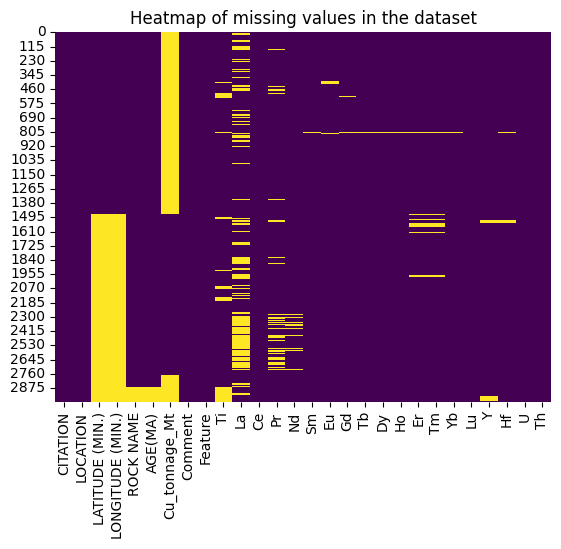

In [12]:
plt.title("Heatmap of missing values in the dataset")
sns.heatmap(df1.isnull(), cbar=False, cmap='viridis')

### Renaming the columns for ease of working

In [13]:
df1.rename(columns = {'LOCATION': 'location', 
                      'LATITUDE (MIN.)':'latitude', 
                      'LONGITUDE (MIN.)':'longitude', 
                      'ROCK NAME':'rock_name', 
                      'AGE(MA)':'age_ma'}, inplace=True)

In [14]:
df1.columns

Index(['CITATION', 'location', 'latitude', 'longitude', 'rock_name', 'age_ma',
       'Cu_tonnage_Mt', 'Comment', 'Feature', 'Ti', 'La', 'Ce', 'Pr', 'Nd',
       'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Y', 'Hf',
       'U', 'Th'],
      dtype='object')

In [15]:
### Checking the latitude column for null values

In [16]:
null_lat_rec = sqldf("""
                        SELECT location, COUNT(*) AS latitude_nulls
                        FROM df1
                        WHERE latitude IS NULL
                        GROUP BY location

                     """)

In [17]:
null_lat_rec

,location,latitude_nulls
0,Aktogai,8
1,Baogutu,6
2,Batu Hijau,63
3,Bishop,19
4,Borly,5
5,Bozshakol,17
6,Chuquicamata,30
7,Chuquicamata-Rad,123
8,Dexing,48
9,El Abra,9


### Data Collection for missing latitude and longitude

In [18]:
coordinates_map = {
    'Aktogai':[46, 80],
    'Baogutu':[45, 84],
    'Batu Hijau':[-9, 117],
    'Bishop':[37, -118],
    'Borly':[48, -76],
    'Bozshakol':[51, 72],
    'Chuquicamata':[-22, -67],
    'Chuquicamata-Rad':[-22, -67],
    'Dexing':[28, 117],
    'El Abra':[-22, -68],
    'El Salvador':[-26, -70],
    'El Teniente':[-34, -70],
    'Erdenet':[49, 104],
    'Heruga':[43, 106],
    'Hugo Dummett':[43, 106],
    'Jiama':[35, 105],
    'Koksai':[44, 78],
    'Kounrad':[47, 75],
    'NChuquicamata-Rad':[-22, -67],
    'Nurkazghan':[50, 73],
    'Opache':[-22, -67],
    'Oyu Tolgoi':[43, 106],
    'Qulong':[30, 92],
    'Radomiro Tomic':[-22, -67],
    'Red Chris':[58, -130],
    'Sar Cheshmeh':[30, 56],
    'Shujiadian':[33, 110],
    'Sungun':[38, 46],
    'Tampakan':[6, 125],
    'Tintaya':[-15, -71],
    'Tuwu-Yandong':[42, 93],
    'Yellowstone':[45, 111],
    'Younger Toba Tuff':[3, 99],
    'Yulong':[31, 98]
}

In [19]:
### Functions to fill missing latitude and longitude values

In [20]:
def set_latitude(location):
    return coordinates_map[location][0]

def set_longitude(location):
    return coordinates_map[location][1]

In [21]:
df1['location'] = df1['location'].apply(str.strip)

In [22]:
null_latitude_rec = df1[df1['latitude'].isnull()]
null_latitude_rec

,CITATION,location,latitude,longitude,rock_name,age_ma,Cu_tonnage_Mt,Comment,Feature,Ti,...,Dy,Ho,Er,Tm,Yb,Lu,Y,Hf,U,Th
1466,Shen et al. 2015,Borly,NaN,NaN,Gr-1,316.0,0.6,Fertility,1,8.64,...,86.5,32.1,NaN,NaN,409.0,83.0,1049.0,9740.0,494.0,342.0
1467,Shen et al. 2015,Borly,NaN,NaN,Gr-2,316.0,0.6,Fertility,1,9.92,...,119.0,43.7,NaN,NaN,527.0,102.0,1408.0,9690.0,625.0,495.0
1468,Shen et al. 2015,Borly,NaN,NaN,Gr-6,316.0,0.6,Fertility,1,10.90,...,83.3,32.6,NaN,NaN,421.0,86.0,1061.0,9320.0,509.0,338.0
1469,Shen et al. 2015,Borly,NaN,NaN,Gr-9,316.0,0.6,Fertility,1,5.60,...,104.0,37.8,NaN,NaN,444.0,86.0,1292.0,9010.0,321.0,319.0
1470,Shen et al. 2015,Borly,NaN,NaN,Gr-10,316.0,0.6,Fertility,1,16.20,...,49.9,18.8,NaN,NaN,203.0,37.0,613.0,9550.0,181.0,123.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2983,Ballard et al. (2002),Chuquicamata-Rad,NaN,NaN,NaN,NaN,NaN,Barren,0,NaN,...,40.9,14.6,65.3,14.9,137.0,24.8,448.0,8803.0,92.0,66.0
2984,Ballard et al. (2002),Chuquicamata-Rad,NaN,NaN,NaN,NaN,NaN,Barren,0,NaN,...,69.5,23.4,102.9,21.9,199.0,34.7,725.0,8854.0,100.0,90.0
2985,Ballard et al. (2002),Chuquicamata-Rad,NaN,NaN,NaN,NaN,NaN,Barren,0,NaN,...,69.2,22.9,99.7,21.2,191.0,33.0,693.0,8890.0,97.0,86.0
2986,Ballard et al. (2002),Chuquicamata-Rad,NaN,NaN,NaN,NaN,NaN,Barren,0,NaN,...,34.2,12.5,58.2,12.9,123.0,21.9,394.0,9032.0,82.0,55.0


### Invoking the functions to replace missing latitudes and longitudes

In [23]:
null_latitude_rec['latitude'] = null_latitude_rec['latitude'].fillna(null_latitude_rec['location']
                                                             .apply(set_latitude))

null_latitude_rec['longitude'] = null_latitude_rec['longitude'].fillna(null_latitude_rec['location']
                                                             .apply(set_longitude))

In [24]:
null_latitude_rec

,CITATION,location,latitude,longitude,rock_name,age_ma,Cu_tonnage_Mt,Comment,Feature,Ti,...,Dy,Ho,Er,Tm,Yb,Lu,Y,Hf,U,Th
1466,Shen et al. 2015,Borly,48.0,-76.0,Gr-1,316.0,0.6,Fertility,1,8.64,...,86.5,32.1,NaN,NaN,409.0,83.0,1049.0,9740.0,494.0,342.0
1467,Shen et al. 2015,Borly,48.0,-76.0,Gr-2,316.0,0.6,Fertility,1,9.92,...,119.0,43.7,NaN,NaN,527.0,102.0,1408.0,9690.0,625.0,495.0
1468,Shen et al. 2015,Borly,48.0,-76.0,Gr-6,316.0,0.6,Fertility,1,10.90,...,83.3,32.6,NaN,NaN,421.0,86.0,1061.0,9320.0,509.0,338.0
1469,Shen et al. 2015,Borly,48.0,-76.0,Gr-9,316.0,0.6,Fertility,1,5.60,...,104.0,37.8,NaN,NaN,444.0,86.0,1292.0,9010.0,321.0,319.0
1470,Shen et al. 2015,Borly,48.0,-76.0,Gr-10,316.0,0.6,Fertility,1,16.20,...,49.9,18.8,NaN,NaN,203.0,37.0,613.0,9550.0,181.0,123.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2983,Ballard et al. (2002),Chuquicamata-Rad,-22.0,-67.0,NaN,NaN,NaN,Barren,0,NaN,...,40.9,14.6,65.3,14.9,137.0,24.8,448.0,8803.0,92.0,66.0
2984,Ballard et al. (2002),Chuquicamata-Rad,-22.0,-67.0,NaN,NaN,NaN,Barren,0,NaN,...,69.5,23.4,102.9,21.9,199.0,34.7,725.0,8854.0,100.0,90.0
2985,Ballard et al. (2002),Chuquicamata-Rad,-22.0,-67.0,NaN,NaN,NaN,Barren,0,NaN,...,69.2,22.9,99.7,21.2,191.0,33.0,693.0,8890.0,97.0,86.0
2986,Ballard et al. (2002),Chuquicamata-Rad,-22.0,-67.0,NaN,NaN,NaN,Barren,0,NaN,...,34.2,12.5,58.2,12.9,123.0,21.9,394.0,9032.0,82.0,55.0


In [25]:
df1.loc[null_latitude_rec.index, 'latitude'] = null_latitude_rec['latitude']
df1.loc[null_latitude_rec.index, 'longitude'] = null_latitude_rec['longitude']

In [26]:
print('Latitude nulls: ', df1['latitude'].isna().sum())
print('Longitude nulls: ', df1['longitude'].isna().sum())

Latitude nulls:  0
Longitude nulls:  0


### Just the trace elements left for handling nulls

In [27]:
df1.isnull().sum().sort_values(ascending=False)

Cu_tonnage_Mt    1687
La                923
Pr                256
Ti                255
rock_name         124
age_ma            124
Nd                 93
Er                 79
Tm                 78
Y                  74
Hf                 25
Eu                 15
Sm                  8
Gd                  6
Ce                  5
Dy                  3
Lu                  2
Yb                  1
Tb                  1
Ho                  1
U                   0
CITATION            0
location            0
Feature             0
Comment             0
longitude           0
latitude            0
Th                  0
dtype: int64

In [28]:
### Missing "rock_name" records belong to BARREN type.

In [29]:
sqldf("""
            
            SELECT Comment, COUNT(*) AS count
            FROM df1
            WHERE rock_name IS NULL
            GROUP BY Comment

      """)

,Comment,count
0,Barren,124


In [30]:
df1.loc[df1['Comment'] == 'Barren'].head(2)

,CITATION,location,latitude,longitude,rock_name,age_ma,Cu_tonnage_Mt,Comment,Feature,Ti,...,Dy,Ho,Er,Tm,Yb,Lu,Y,Hf,U,Th
0,[19221] ZHAO SHAO-QING (2015),CENTRAL ASIAN FOLDBELT - MESOZOIC / CHINA - ME...,33.0,95.0,DACITE,222.0,NaN,Barren,0,7.88,...,295.0,125.0,526.0,129.0,1077.0,199.0,2737.0,12390.0,305.0,134.0
1,[19221] ZHAO SHAO-QING (2015),CENTRAL ASIAN FOLDBELT - MESOZOIC / CHINA - ME...,33.0,95.0,DACITE,222.0,NaN,Barren,0,10.90,...,361.0,147.0,611.0,148.0,1232.0,228.0,3226.0,12591.0,503.0,272.0


In [31]:
# Notice that a few of the Barren ores contain rock_name. A good approach is to fill the missing values with mode.
# In Addition, there is a category by the name "NOT GIVEN". We can even choose to replace nulls with it.

In [32]:
df1.loc[df1['Comment'] == 'Barren']['rock_name'].value_counts()

GRANITE              524
NOT GIVEN            214
GRANITE, RAPAKIVI    168
ANDESITE             107
GNEISS                88
                    ... 
RC13-78_56             1
RC13-78_34             1
RC13-78_33             1
RC13-78_31             1
TTZ1-58                1
Name: rock_name, Length: 115, dtype: int64

In [33]:
### All missing rock_name records belong to one location: "Chuquicamata-Rad"

In [34]:
df1.loc[df1['rock_name'].isnull()][['Comment', 'rock_name', 'age_ma', 'location']]

,Comment,rock_name,age_ma,location
2864,Barren,NaN,NaN,NChuquicamata-Rad
2865,Barren,NaN,NaN,Chuquicamata-Rad
2866,Barren,NaN,NaN,Chuquicamata-Rad
2867,Barren,NaN,NaN,Chuquicamata-Rad
2868,Barren,NaN,NaN,Chuquicamata-Rad
...,...,...,...,...
2983,Barren,NaN,NaN,Chuquicamata-Rad
2984,Barren,NaN,NaN,Chuquicamata-Rad
2985,Barren,NaN,NaN,Chuquicamata-Rad
2986,Barren,NaN,NaN,Chuquicamata-Rad


In [35]:
sqldf("""
            SELECT location, age_ma, Comment, rock_name, latitude, longitude
            FROM df1
            WHERE location = 'Chuquicamata'
            
     """)

,location,age_ma,Comment,rock_name,latitude,longitude
0,Chuquicamata,35.0,Fertility,610-01,-22.0,-67.0
1,Chuquicamata,35.0,Fertility,610-02,-22.0,-67.0
2,Chuquicamata,35.0,Fertility,610-03,-22.0,-67.0
3,Chuquicamata,35.0,Fertility,610-04,-22.0,-67.0
4,Chuquicamata,35.0,Fertility,610-05,-22.0,-67.0
5,Chuquicamata,35.0,Fertility,610-06,-22.0,-67.0
6,Chuquicamata,35.0,Fertility,610-07,-22.0,-67.0
7,Chuquicamata,35.0,Fertility,610-08,-22.0,-67.0
8,Chuquicamata,35.0,Fertility,610-09,-22.0,-67.0
9,Chuquicamata,35.0,Fertility,610-10,-22.0,-67.0


In [36]:
df1.loc[df1['location'] == 'NChuquicamata-Rad', 'location'] = 'Chuquicamata-Rad'

In [37]:
df1['location'].value_counts()

Hugo Dummett                                                                                                          252
Heruga                                                                                                                208
BALTIC SHIELD - PROTEROZOIC / SVECOFENNIAN PROVINCE / FINLAND / WIBORG RAPAKIVI GRANITE BATHOLITH                     168
CENTRAL ASIAN FOLDBELT - CENOZOIC/QUATERNARY / CHINA - CENOZOIC/QUATERNARY / TIBET                                    150
CENTRAL ASIAN FOLDBELT - PALEOZOIC / CHINA - PALEOZOIC / GUANGXI PROVINCE / DARONGSHAN BATHOLITH - JIUZHOU COMPLEX    144
                                                                                                                     ... 
Aktogai                                                                                                                 8
Erdenet                                                                                                                 8
Baogutu                 

In [38]:
### Age_ma missing values

In [39]:
null_age = sqldf("""
                      SELECT location, Comment  
                      FROM df1
                      WHERE age_ma IS NULL
                  """)

In [40]:
null_age['Comment'].value_counts()

Barren    124
Name: Comment, dtype: int64

In [41]:
null_age

,location,Comment
0,Chuquicamata-Rad,Barren
1,Chuquicamata-Rad,Barren
2,Chuquicamata-Rad,Barren
3,Chuquicamata-Rad,Barren
4,Chuquicamata-Rad,Barren
...,...,...
119,Chuquicamata-Rad,Barren
120,Chuquicamata-Rad,Barren
121,Chuquicamata-Rad,Barren
122,Chuquicamata-Rad,Barren


In [42]:
null_age['location'].value_counts()

Chuquicamata-Rad    124
Name: location, dtype: int64

In [43]:
df1['age_ma'].sample(20)

1476     313.00000
896     1643.99362
2096     372.00000
1960      16.00000
2765     203.00000
1842       3.70000
2122     372.00000
1678     170.00000
2723     370.00000
611      383.00000
1973     328.00000
2495     370.00000
1393     103.00000
2424     370.00000
444       15.20000
933      216.00000
263      235.00000
1954      16.00000
1239    3539.00000
2533     370.00000
Name: age_ma, dtype: float64

In [44]:
df1.columns

Index(['CITATION', 'location', 'latitude', 'longitude', 'rock_name', 'age_ma',
       'Cu_tonnage_Mt', 'Comment', 'Feature', 'Ti', 'La', 'Ce', 'Pr', 'Nd',
       'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Y', 'Hf',
       'U', 'Th'],
      dtype='object')

In [45]:
df1.drop(columns=['CITATION', 'rock_name', 'latitude', 'longitude', 'Cu_tonnage_Mt'], 
         inplace=True)

In [46]:
df1.columns

Index(['location', 'age_ma', 'Comment', 'Feature', 'Ti', 'La', 'Ce', 'Pr',
       'Nd', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Y',
       'Hf', 'U', 'Th'],
      dtype='object')

In [47]:
df1.isnull().sum().sort_values(ascending=False)

La          923
Pr          256
Ti          255
age_ma      124
Nd           93
Er           79
Tm           78
Y            74
Hf           25
Eu           15
Sm            8
Gd            6
Ce            5
Dy            3
Lu            2
Tb            1
Ho            1
Yb            1
U             0
location      0
Feature       0
Comment       0
Th            0
dtype: int64

In [48]:
df1.columns

Index(['location', 'age_ma', 'Comment', 'Feature', 'Ti', 'La', 'Ce', 'Pr',
       'Nd', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Y',
       'Hf', 'U', 'Th'],
      dtype='object')

### Median Imputation of Null Values

In [49]:
def replace_nulls(df, features):
    for feature in features:
        
        feature_median = df1[feature].median()
        
        print(feature, feature_median)
        
        df[feature] = df[feature].fillna(feature_median)
        
    return df

In [50]:
df1['age_ma'].isnull().sum()

124

In [51]:
features = ['Ti', 'La', 'Ce', 'Pr', 'Nd', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy',
            'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Y', 'Hf', 'U', 'Th']

In [52]:
# Copy of the dataframe
df1_copy = df1.copy()

In [53]:
df1_copy = replace_nulls(df1_copy, features)

Ti 7.22
La 0.09
Ce 14.8
Pr 0.10560457100000001
Nd 1.47
Sm 2.979013672
Eu 0.6647571
Gd 16.88696182
Tb 5.99
Dy 67.35714722
Ho 28.63898955
Er 133.0
Tm 31.855585745
Yb 326.2416992
Lu 65.088261415
Y 830.1593614000001
Hf 9563.0
U 234.0
Th 118.60787765


In [54]:
df1_copy.isnull().sum()

location      0
age_ma      124
Comment       0
Feature       0
Ti            0
La            0
Ce            0
Pr            0
Nd            0
Sm            0
Eu            0
Gd            0
Tb            0
Dy            0
Ho            0
Er            0
Tm            0
Yb            0
Lu            0
Y             0
Hf            0
U             0
Th            0
dtype: int64

In [55]:
df1_copy.loc[df1_copy['age_ma'].isnull()]

,location,age_ma,Comment,Feature,Ti,La,Ce,Pr,Nd,Sm,...,Dy,Ho,Er,Tm,Yb,Lu,Y,Hf,U,Th
2864,Chuquicamata-Rad,NaN,Barren,0,7.22,0.068,15.0,0.546,7.23,10.15,...,153.4,53.7,228.6,46.0,408.0,70.1,1609.0,8515.0,453.0,494.0
2865,Chuquicamata-Rad,NaN,Barren,0,7.22,0.074,15.0,0.532,6.95,10.38,...,164.7,57.2,247.0,50.1,445.0,76.5,1735.0,8836.0,445.0,493.0
2866,Chuquicamata-Rad,NaN,Barren,0,7.22,0.036,21.0,0.469,7.14,10.81,...,153.4,52.1,222.6,46.2,412.0,69.7,1563.0,10070.0,544.0,533.0
2867,Chuquicamata-Rad,NaN,Barren,0,7.22,0.062,20.0,0.574,7.82,11.32,...,153.9,51.9,222.0,45.8,412.0,69.1,1545.0,9855.0,506.0,498.0
2868,Chuquicamata-Rad,NaN,Barren,0,7.22,0.003,15.0,0.089,2.07,4.21,...,92.0,32.7,142.6,30.9,286.0,49.5,988.0,10232.0,312.0,271.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2983,Chuquicamata-Rad,NaN,Barren,0,7.22,0.007,8.0,0.051,0.83,1.75,...,40.9,14.6,65.3,14.9,137.0,24.8,448.0,8803.0,92.0,66.0
2984,Chuquicamata-Rad,NaN,Barren,0,7.22,0.013,9.0,0.137,2.00,3.76,...,69.5,23.4,102.9,21.9,199.0,34.7,725.0,8854.0,100.0,90.0
2985,Chuquicamata-Rad,NaN,Barren,0,7.22,0.015,9.0,0.172,2.82,4.31,...,69.2,22.9,99.7,21.2,191.0,33.0,693.0,8890.0,97.0,86.0
2986,Chuquicamata-Rad,NaN,Barren,0,7.22,0.002,8.0,0.039,0.70,1.56,...,34.2,12.5,58.2,12.9,123.0,21.9,394.0,9032.0,82.0,55.0


In [56]:
df1_copy.loc[df1_copy['location'] == 'Chuquicamata-Rad', 'age_ma'] = 35.0

In [57]:
df1_copy.isna().sum()

location    0
age_ma      0
Comment     0
Feature     0
Ti          0
La          0
Ce          0
Pr          0
Nd          0
Sm          0
Eu          0
Gd          0
Tb          0
Dy          0
Ho          0
Er          0
Tm          0
Yb          0
Lu          0
Y           0
Hf          0
U           0
Th          0
dtype: int64

In [58]:
df1_copy['Feature'].value_counts()

0    1687
1    1301
Name: Feature, dtype: int64

In [59]:
df1_copy.columns

Index(['location', 'age_ma', 'Comment', 'Feature', 'Ti', 'La', 'Ce', 'Pr',
       'Nd', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Y',
       'Hf', 'U', 'Th'],
      dtype='object')

In [60]:
df1_copy.drop(columns = ['location', 'Comment']).to_csv("../data_with_outliers_median_imputed.csv")

In [61]:
df1_copy.columns

Index(['location', 'age_ma', 'Comment', 'Feature', 'Ti', 'La', 'Ce', 'Pr',
       'Nd', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Y',
       'Hf', 'U', 'Th'],
      dtype='object')

In [62]:
features_with_outliers = ['age_ma', 'Ti', 'La', 'Ce', 'Pr', 'Nd', 'Sm', 'Eu', 'Gd',
                           'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Y', 'Hf', 'U', 'Th']

### Box-plot before handling outliers

age_ma float64


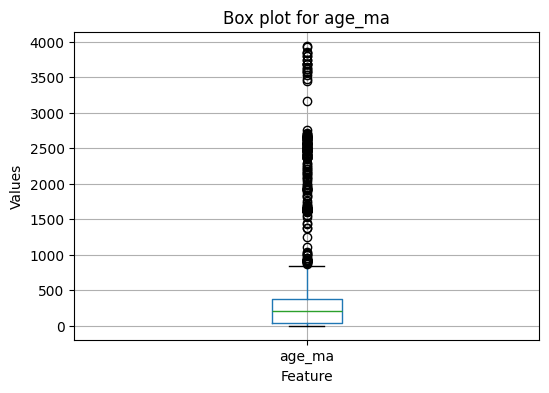

Ti float64


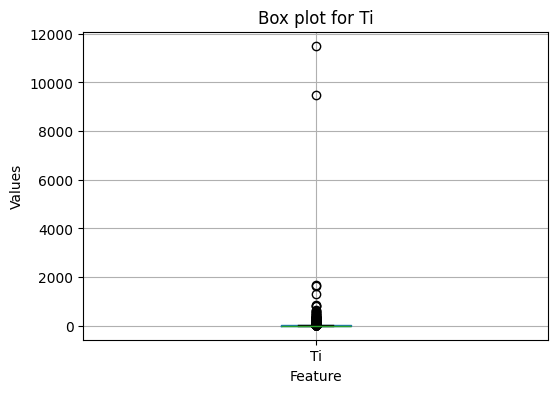

La float64


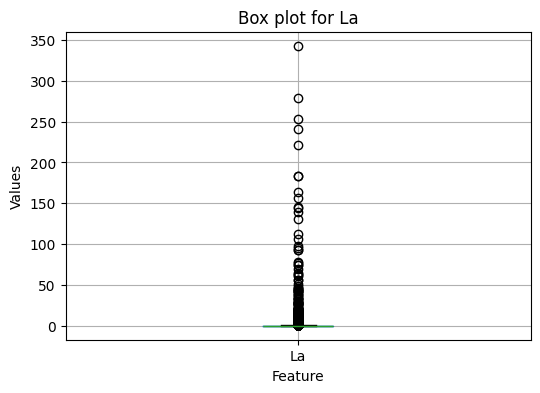

Ce float64


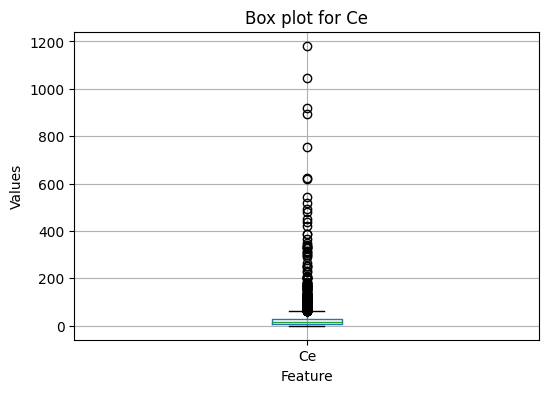

Pr float64


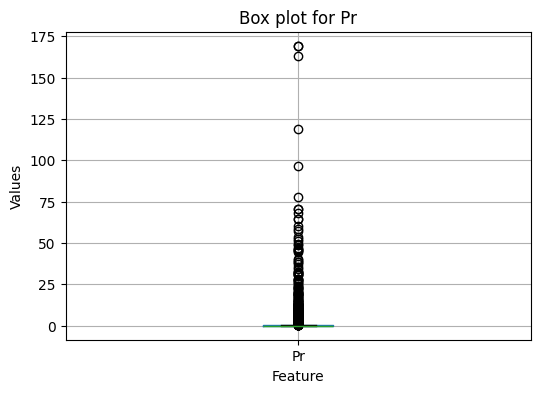

Nd float64


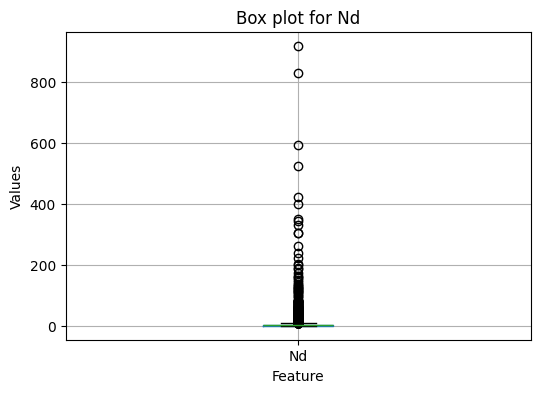

Sm float64


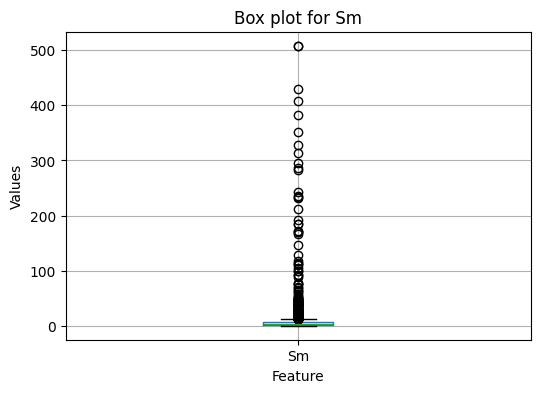

Eu float64


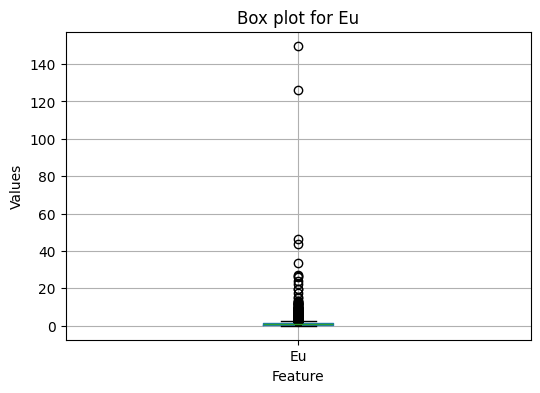

Gd float64


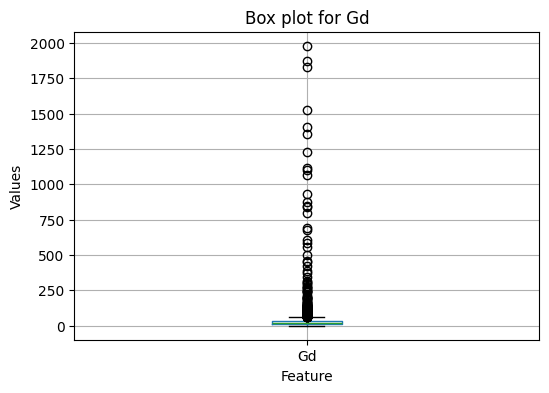

Tb float64


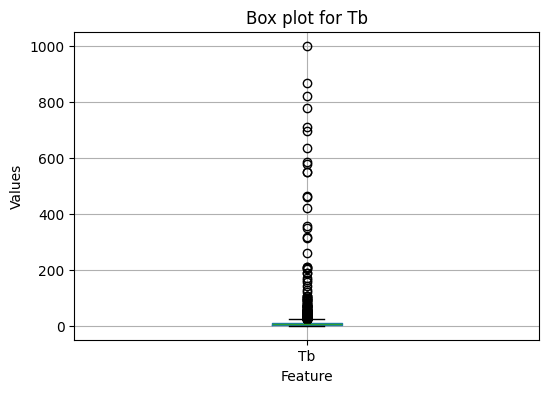

Dy float64


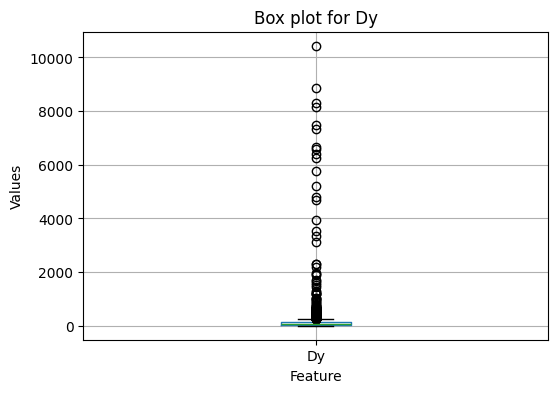

Ho float64


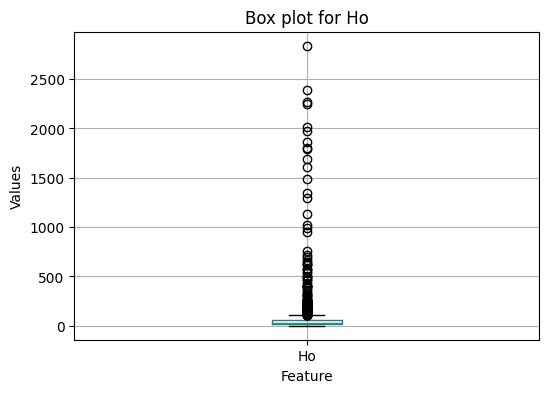

Er float64


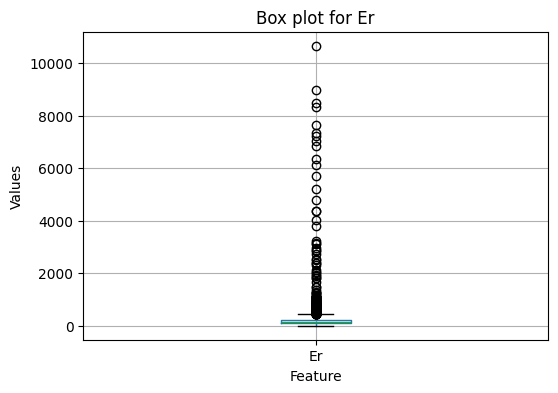

Tm float64


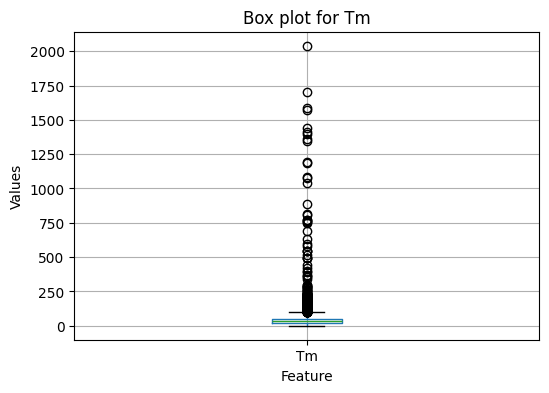

Yb float64


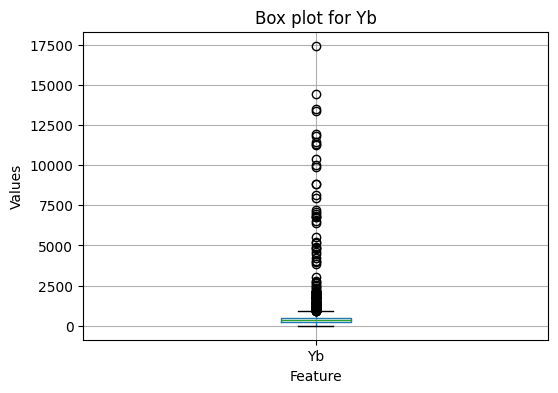

Lu float64


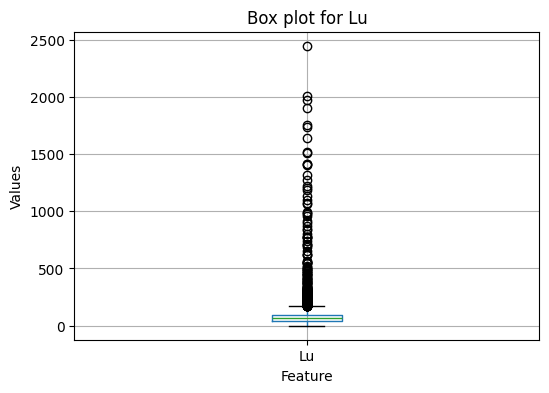

Y float64


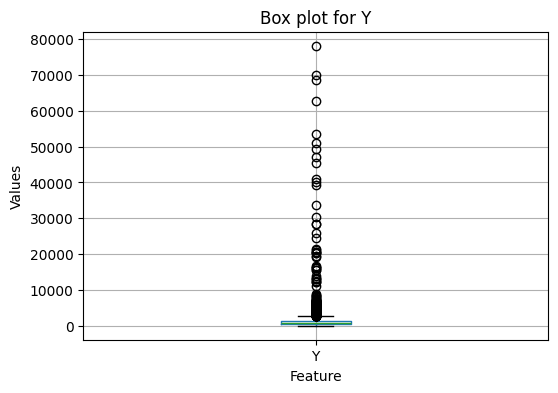

Hf float64


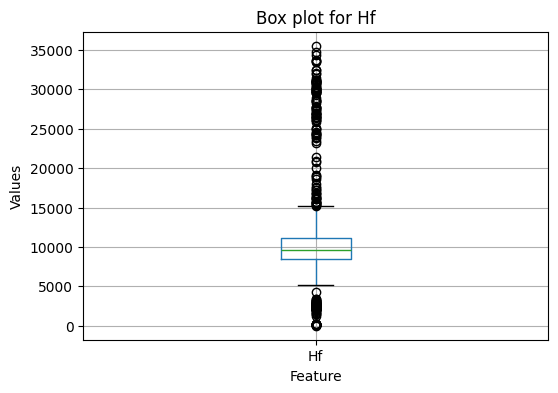

U float64


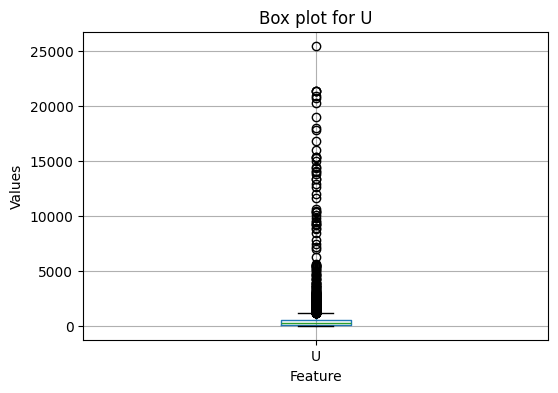

Th float64


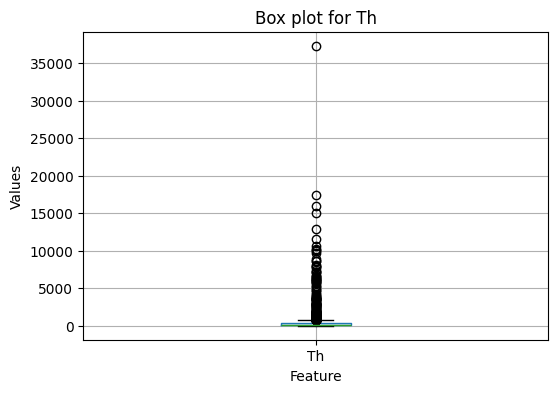

In [63]:
for feature in features_with_outliers:
    print(feature, df1_copy[feature].dtype)
    plt.figure(figsize=(6, 4))
    df1_copy[[feature]].boxplot()
    plt.title(f'Box plot for {feature}')
    plt.ylabel('Values')
    plt.xlabel('Feature')
    plt.show()

### Logistic Regression - Median Imputed, With Outliers

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [65]:
df1_copy.columns

Index(['location', 'age_ma', 'Comment', 'Feature', 'Ti', 'La', 'Ce', 'Pr',
       'Nd', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Y',
       'Hf', 'U', 'Th'],
      dtype='object')

In [66]:
X = df1_copy.drop(columns = ['location', 'Comment', 'Feature'])
y = df1_copy['Feature']

In [67]:
X.columns

Index(['age_ma', 'Ti', 'La', 'Ce', 'Pr', 'Nd', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy',
       'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Y', 'Hf', 'U', 'Th'],
      dtype='object')

In [68]:
X.head()

,age_ma,Ti,La,Ce,Pr,Nd,Sm,Eu,Gd,Tb,Dy,Ho,Er,Tm,Yb,Lu,Y,Hf,U,Th
0,222.0,7.88,0.05,10.5,0.050000,4.25,11.60,1.99,61.6,24.5,295.0,125.0,526.0,129.0,1077.0,199.0,2737.0,12390.0,305.0,134.0
1,222.0,10.90,69.10,169.0,22.500000,132.00,41.80,4.34,102.0,32.7,361.0,147.0,611.0,148.0,1232.0,228.0,3226.0,12591.0,503.0,272.0
2,222.0,6.00,0.02,25.1,0.300000,4.41,13.80,2.30,79.9,34.4,415.0,172.0,701.0,167.0,1358.0,248.0,3675.0,12724.0,639.0,414.0
3,222.0,9.06,0.28,12.0,0.105605,1.88,5.08,1.01,33.8,15.5,194.0,83.0,356.0,89.5,762.0,144.0,1832.0,12894.0,308.0,127.0
4,222.0,4.93,0.07,16.5,0.150000,2.32,8.23,1.52,45.6,19.7,257.0,108.0,456.0,111.0,936.0,171.0,2355.0,12535.0,348.0,155.0


In [69]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Feature, dtype: int64

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y)

In [71]:
type(X_train)

pandas.core.frame.DataFrame

In [72]:
y_train.shape

(2390,)

In [73]:
y_train.sum()

1041

### Perform scaling

In [74]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Logistic Regression Model

In [75]:
lr_model = LogisticRegression()

In [76]:
lr_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [77]:
y_pred = lr_model.predict(X_test_scaled)

In [78]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [79]:
accuracy_score(y_test, y_pred)

0.842809364548495

In [80]:
cm = confusion_matrix(y_test, y_pred)

In [81]:
cm

array([[265,  73],
       [ 21, 239]])

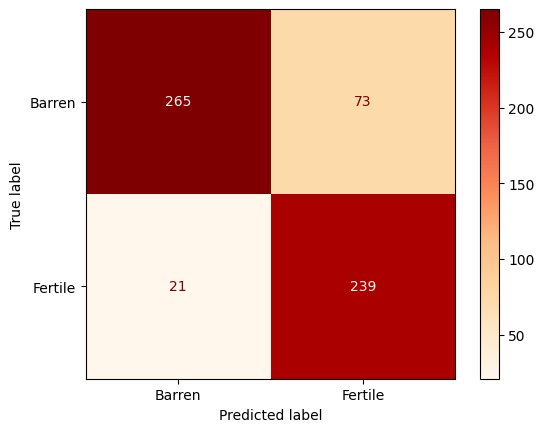

In [82]:
ConfusionMatrixDisplay(cm, display_labels=['Barren', 'Fertile']).plot(cmap='OrRd')

In [83]:
target_names = ['Barren', 'Fertility']

report = classification_report(y_test, y_pred, target_names=target_names, digits=4)
print(report)

              precision    recall  f1-score   support

      Barren     0.9266    0.7840    0.8494       338
   Fertility     0.7660    0.9192    0.8357       260

    accuracy                         0.8428       598
   macro avg     0.8463    0.8516    0.8425       598
weighted avg     0.8568    0.8428    0.8434       598



### Now we are handling outliers

In [84]:
import pandas as pd

def replace_outliers(df):
    # Loop through each column
    for feature in features_with_outliers:
        # Check if the column contains numeric data (integer or float)
        if df[feature].dtype in ['int64', 'float64']:
            # Calculate the first and third quartiles
            q1 = df[feature].quantile(0.25)
            q3 = df[feature].quantile(0.75)
            
            # Calculate the interquartile range (IQR)
            iqr = q3 - q1
            
            # Define the lower and upper bounds for outliers
            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr
            
            # Replace outliers with the maximum and minimum values of the column
            df[feature] = df[feature].apply(lambda x: max(x, lower_bound) if x < lower_bound 
                                            else min(x, upper_bound) if x > upper_bound 
                                            else x)
    
    return df

In [85]:
df1_copy = replace_outliers(df1_copy)

### Box-plots after handling outliers

age_ma float64


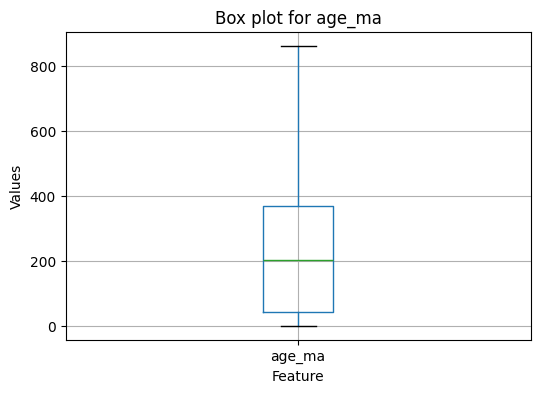

Ti float64


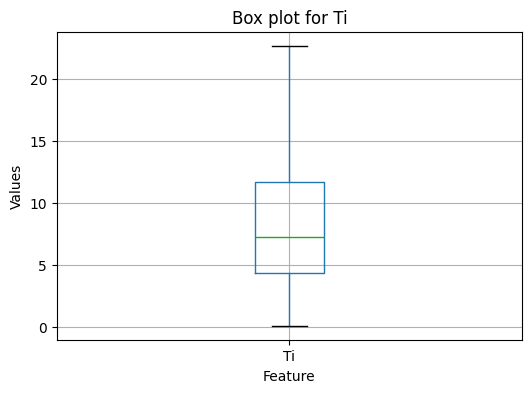

La float64


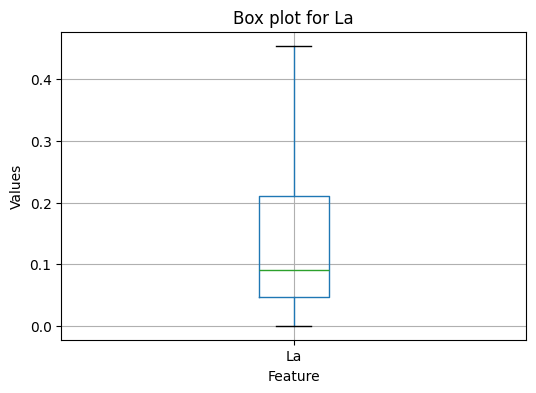

Ce float64


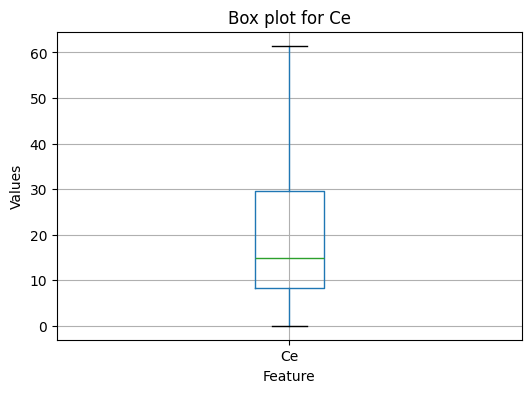

Pr float64


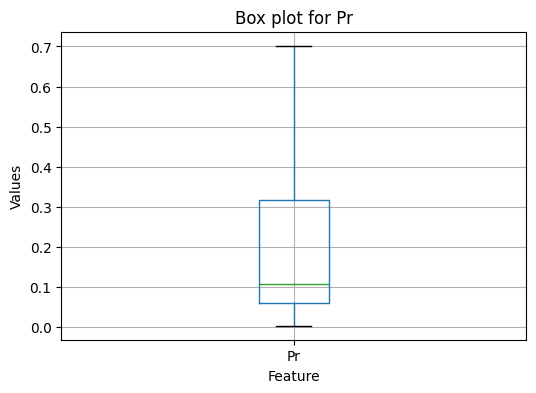

Nd float64


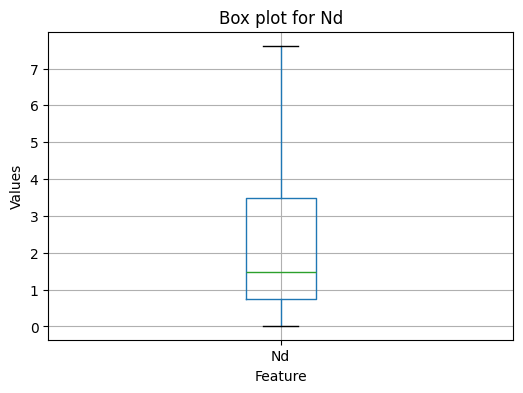

Sm float64


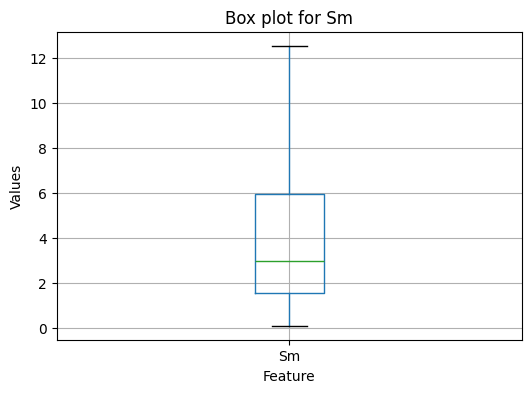

Eu float64


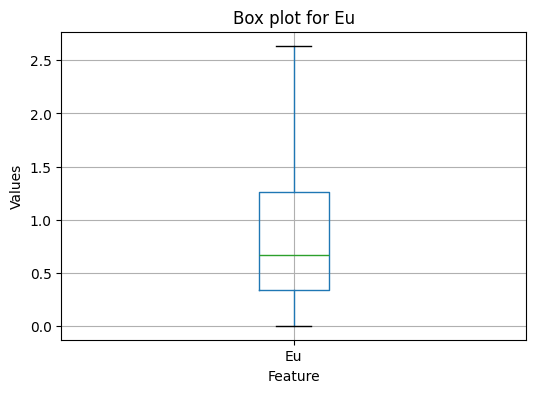

Gd float64


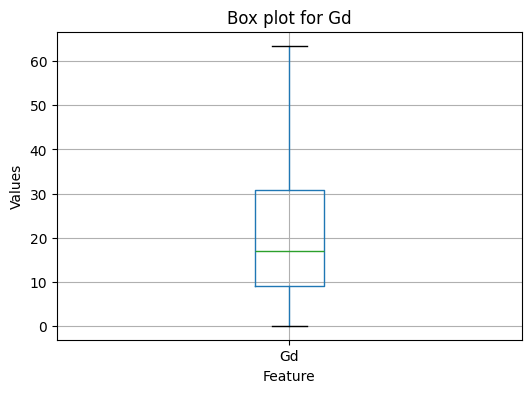

Tb float64


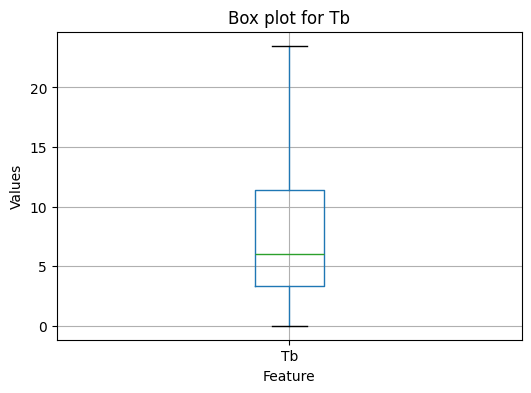

Dy float64


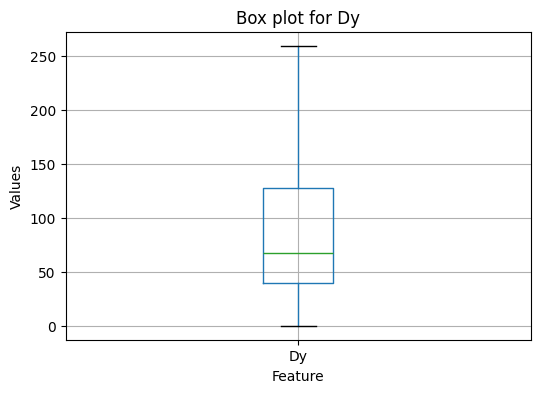

Ho float64


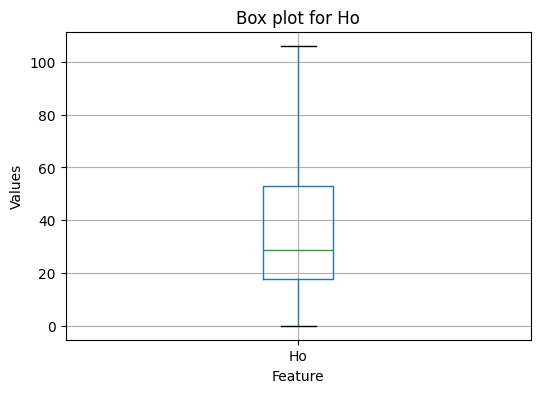

Er float64


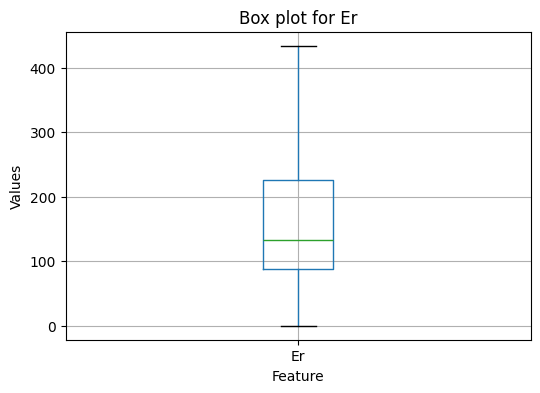

Tm float64


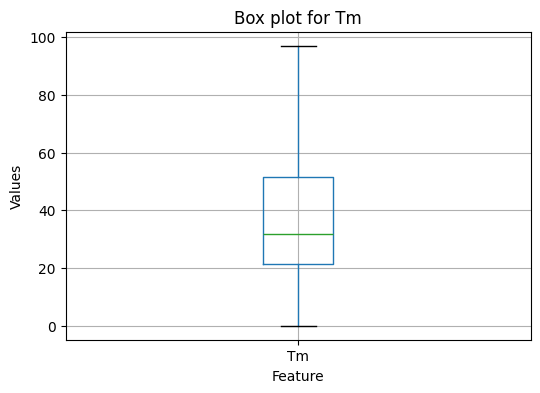

Yb float64


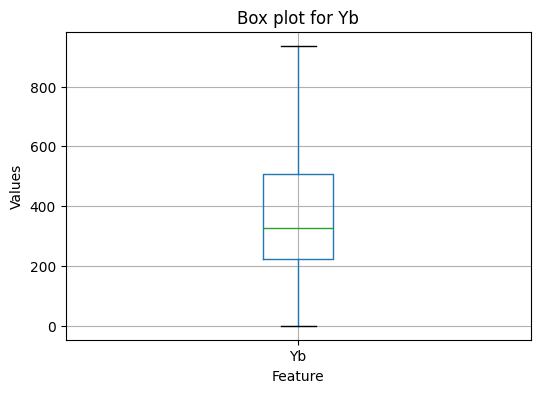

Lu float64


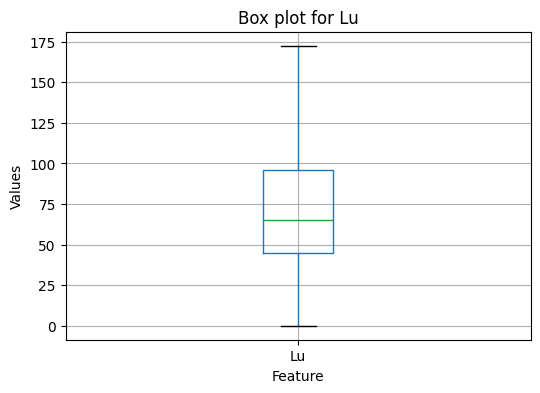

Y float64


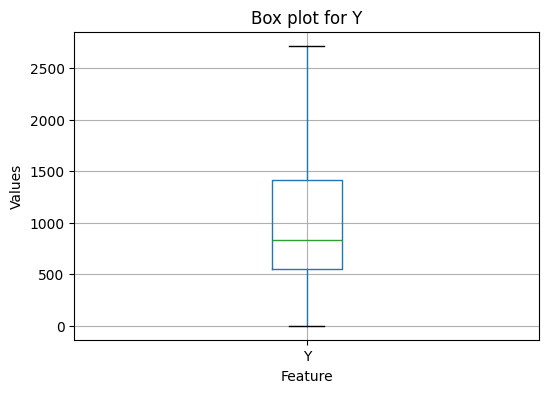

Hf float64


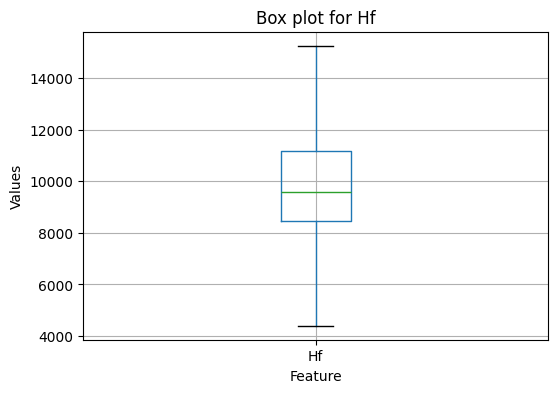

U float64


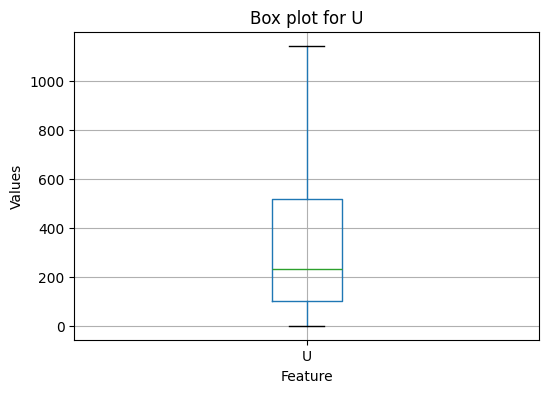

Th float64


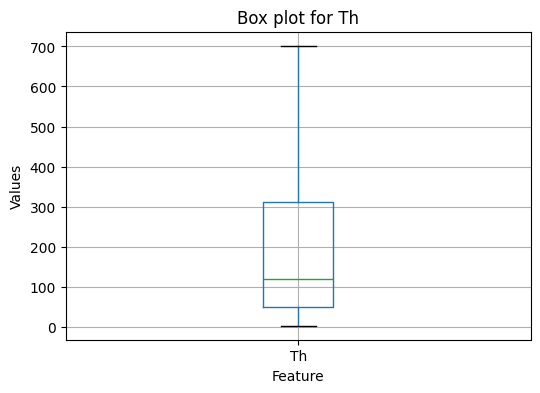

In [86]:
for feature in features_with_outliers:
    print(feature, df1_copy[feature].dtype)
    plt.figure(figsize=(6, 4))
    df1_copy[[feature]].boxplot()
    plt.title(f'Box plot for {feature}')
    plt.ylabel('Values')
    plt.xlabel('Feature')
    plt.show()

In [87]:
df1_copy.columns

Index(['location', 'age_ma', 'Comment', 'Feature', 'Ti', 'La', 'Ce', 'Pr',
       'Nd', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Y',
       'Hf', 'U', 'Th'],
      dtype='object')

In [88]:
df1_copy.drop(columns=['location', 'Comment']).to_csv("../data_outliers_handled_median_imputed.csv")

### Creating a new cluster ID column replacing latitude and longitude

In [89]:
# df1_copy.columns

In [90]:
# from sklearn.cluster import KMeans ,AgglomerativeClustering

# # creates 5 clusters using hierarchical clustering.
# agc = AgglomerativeClustering(n_clusters =5, 
#                               affinity='euclidean', 
#                               linkage='ward'
#                              )

# df1_copy['Agg Cluster ID'] = agc.fit_predict(df1_copy[['latitude','longitude']])

In [91]:
# df1_copy['Agg Cluster ID'].value_counts()

In [92]:
# # creates 5 clusters using k-means clustering algorithm.
# kmeans = KMeans(5)
# # clusters = kmeans.fit_predict(df1_copy[['latitude','longitude']])
# df1_copy['kmeans Cluster ID'] = kmeans.fit_predict(df1_copy[['latitude','longitude']])

In [93]:
# df1_copy['kmeans Cluster ID'].value_counts()

### For time being let us consider Agg Cluster ID in our analysis. Replacing latitude and longitude

In [94]:
df1_copy.columns

Index(['location', 'age_ma', 'Comment', 'Feature', 'Ti', 'La', 'Ce', 'Pr',
       'Nd', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Y',
       'Hf', 'U', 'Th'],
      dtype='object')

### Scatter plot of clustered data points

In [95]:
# plt.title("Scatter Plot of clustered data points")
# plt.scatter(df1_copy["latitude"], df1_copy["longitude"], c = df1_copy["Agg Cluster ID"], )
# plt.xlabel("Latitude")
# plt.ylabel("Longitude")

In [96]:
# plt.title("Scatter Plot of clustered data points")
# plt.scatter(df1_copy["latitude"], df1_copy["longitude"], c = df1_copy["kmeans Cluster ID"])
# plt.xlabel("Latitude")
# plt.ylabel("Longitude")

### Feature Correlation

In [97]:
# df1_copy[['Ti', 'La', 'Ce', 'Pr']]

In [98]:
df1_copy.corr()

,age_ma,Feature,Ti,La,Ce,Pr,Nd,Sm,Eu,Gd,...,Dy,Ho,Er,Tm,Yb,Lu,Y,Hf,U,Th
age_ma,1.000000,-0.189150,0.295922,0.144834,-0.112989,0.130484,0.132503,0.077941,-0.068417,0.015874,...,-0.015452,-0.069138,-0.044640,-0.089069,-0.062256,-0.162639,-0.121103,0.103737,-0.172432,-0.250605
Feature,-0.189150,1.000000,-0.334678,-0.379508,-0.099995,-0.443655,-0.462226,-0.464450,-0.035048,-0.402390,...,-0.466397,-0.361153,-0.367534,-0.347631,-0.278780,-0.222192,-0.388005,-0.369591,-0.214350,-0.191801
Ti,0.295922,-0.334678,1.000000,0.225459,0.081738,0.317068,0.380869,0.397287,0.251246,0.365768,...,0.250888,0.225800,0.202677,0.152066,0.127360,0.034899,0.207948,0.132514,-0.125904,0.016615
La,0.144834,-0.379508,0.225459,1.000000,0.442516,0.795966,0.636202,0.459209,0.305634,0.279022,...,0.287794,0.273684,0.258769,0.310586,0.241465,0.279217,0.244905,0.128141,0.247353,0.271912
Ce,-0.112989,-0.099995,0.081738,0.442516,1.000000,0.530666,0.576406,0.550295,0.553524,0.466478,...,0.398415,0.371555,0.417026,0.372331,0.408619,0.390776,0.445314,0.192486,0.477930,0.726890
Pr,0.130484,-0.443655,0.317068,0.795966,0.530666,1.000000,0.899975,0.736724,0.496502,0.531152,...,0.462254,0.442418,0.397161,0.424909,0.319970,0.353335,0.393766,0.089392,0.265643,0.385707
Nd,0.132503,-0.462226,0.380869,0.636202,0.576406,0.899975,1.000000,0.880896,0.539171,0.702766,...,0.613139,0.484602,0.521764,0.445446,0.427456,0.348232,0.529223,0.164697,0.280469,0.469371
Sm,0.077941,-0.464450,0.397287,0.459209,0.550295,0.736724,0.880896,1.000000,0.584571,0.887584,...,0.789201,0.691680,0.700223,0.634870,0.578439,0.511576,0.697130,0.245778,0.355242,0.534715
Eu,-0.068417,-0.035048,0.251246,0.305634,0.553524,0.496502,0.539171,0.584571,1.000000,0.471214,...,0.341469,0.374661,0.323957,0.368564,0.306166,0.357397,0.342791,-0.120787,0.137388,0.358469
Gd,0.015874,-0.402390,0.365768,0.279022,0.466478,0.531152,0.702766,0.887584,0.471214,1.000000,...,0.887339,0.848974,0.857644,0.746218,0.731610,0.615759,0.840448,0.366962,0.394562,0.554585


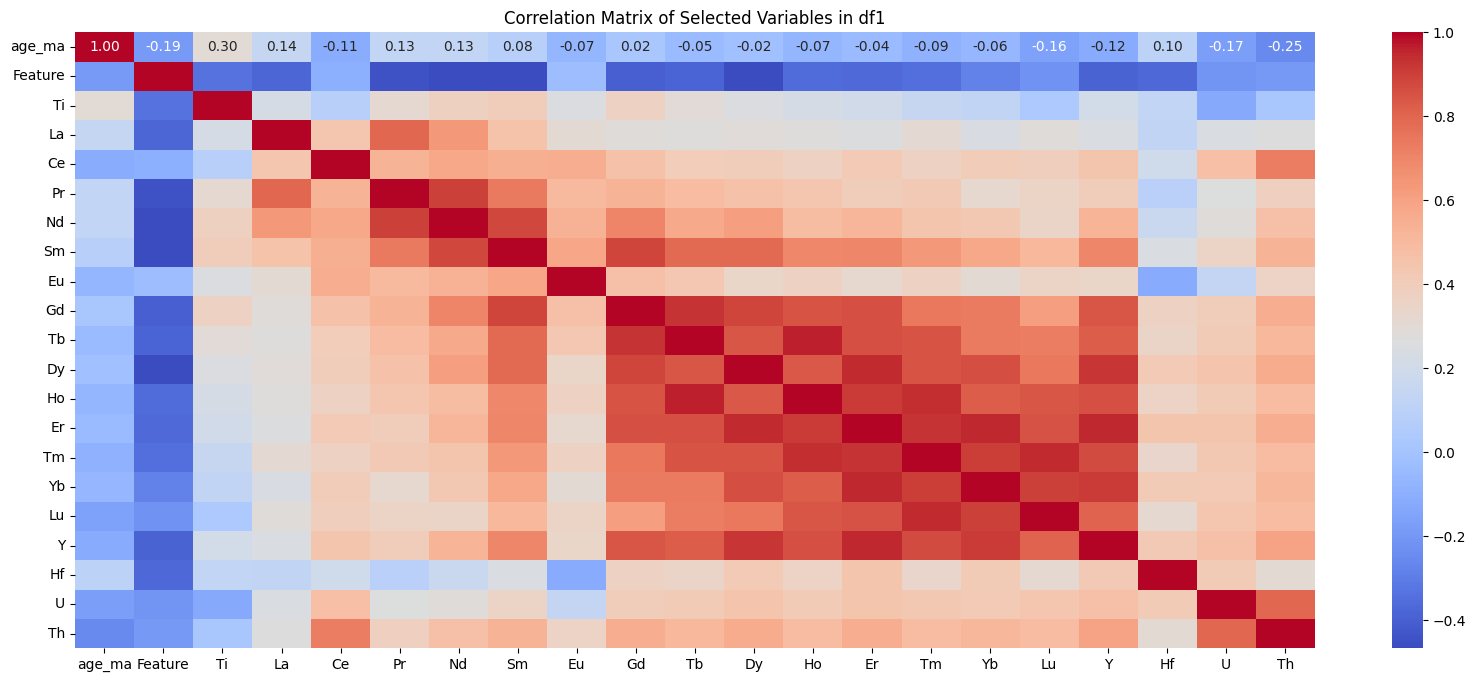

In [99]:
plt.figure(figsize=(20, 8))
corr = df1_copy.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Selected Variables in df1')
plt.show()

### Logistic Regression - Median Imputed, Outliers Handled

In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [101]:
df1_copy.columns

Index(['location', 'age_ma', 'Comment', 'Feature', 'Ti', 'La', 'Ce', 'Pr',
       'Nd', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Y',
       'Hf', 'U', 'Th'],
      dtype='object')

In [102]:
X = df1_copy.drop(columns = ['location', 'Comment', 'Feature'])
y = df1_copy['Feature']

In [103]:
X.columns

Index(['age_ma', 'Ti', 'La', 'Ce', 'Pr', 'Nd', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy',
       'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Y', 'Hf', 'U', 'Th'],
      dtype='object')

In [104]:
X.head()

,age_ma,Ti,La,Ce,Pr,Nd,Sm,Eu,Gd,Tb,Dy,Ho,Er,Tm,Yb,Lu,Y,Hf,U,Th
0,222.0,7.88,0.0500,10.500000,0.050000,4.250000,11.600000,1.990000,61.600000,23.495933,259.214141,106.1375,434.18329,97.083086,936.724661,172.530636,2716.955779,12390.0,305.0,134.0
1,222.0,10.90,0.4545,61.474347,0.701901,7.618805,12.540955,2.637494,63.498619,23.495933,259.214141,106.1375,434.18329,97.083086,936.724661,172.530636,2716.955779,12591.0,503.0,272.0
2,222.0,6.00,0.0200,25.100000,0.300000,4.410000,12.540955,2.300000,63.498619,23.495933,259.214141,106.1375,434.18329,97.083086,936.724661,172.530636,2716.955779,12724.0,639.0,414.0
3,222.0,9.06,0.2800,12.000000,0.105605,1.880000,5.080000,1.010000,33.800000,15.500000,194.000000,83.0000,356.00000,89.500000,762.000000,144.000000,1832.000000,12894.0,308.0,127.0
4,222.0,4.93,0.0700,16.500000,0.150000,2.320000,8.230000,1.520000,45.600000,19.700000,257.000000,106.1375,434.18329,97.083086,936.000000,171.000000,2355.000000,12535.0,348.0,155.0


In [105]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Feature, dtype: int64

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y)

In [107]:
type(X_train)

pandas.core.frame.DataFrame

In [108]:
y_train.shape

(2390,)

In [109]:
y_train.sum()

1041

### Perform scaling

In [110]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Logistic Regression Model

In [111]:
lr_model = LogisticRegression()

In [112]:
lr_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [113]:
y_pred = lr_model.predict(X_test_scaled)

In [114]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [115]:
accuracy_score(y_test, y_pred)

0.8846153846153846

In [116]:
cm = confusion_matrix(y_test, y_pred)

In [117]:
cm

array([[296,  42],
       [ 27, 233]])

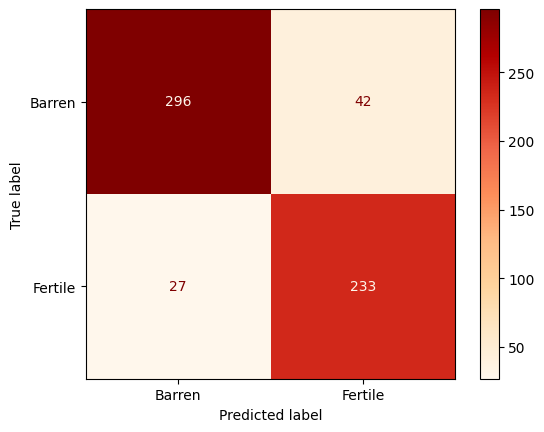

In [118]:
ConfusionMatrixDisplay(cm, display_labels=['Barren', 'Fertile']).plot(cmap='OrRd')

In [119]:
target_names = ['Barren', 'Fertility']

report = classification_report(y_test, y_pred, target_names=target_names, digits=4)
print(report)

              precision    recall  f1-score   support

      Barren     0.9164    0.8757    0.8956       338
   Fertility     0.8473    0.8962    0.8710       260

    accuracy                         0.8846       598
   macro avg     0.8818    0.8859    0.8833       598
weighted avg     0.8863    0.8846    0.8849       598



## Null Handling - K Nearest Neighbors Imputation

In [120]:
df_new = df1.copy()

In [121]:
df_new.columns

Index(['location', 'age_ma', 'Comment', 'Feature', 'Ti', 'La', 'Ce', 'Pr',
       'Nd', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Y',
       'Hf', 'U', 'Th'],
      dtype='object')

In [122]:
df_new.drop(columns=['Comment', 'location'], inplace=True)

In [123]:
df_new.isnull().sum()

age_ma     124
Feature      0
Ti         255
La         923
Ce           5
Pr         256
Nd          93
Sm           8
Eu          15
Gd           6
Tb           1
Dy           3
Ho           1
Er          79
Tm          78
Yb           1
Lu           2
Y           74
Hf          25
U            0
Th           0
dtype: int64

In [124]:
features = df_new.columns

In [125]:
features.drop(labels=['Feature'])

Index(['age_ma', 'Ti', 'La', 'Ce', 'Pr', 'Nd', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy',
       'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Y', 'Hf', 'U', 'Th'],
      dtype='object')

In [126]:
from sklearn.impute import KNNImputer

In [127]:
knn_imputer = KNNImputer(missing_values=np.nan, 
                         n_neighbors = 5,
                         weights='distance',
                         copy=False)

In [128]:
df_new = pd.DataFrame(knn_imputer.fit_transform(df_new[features]))
df_new.columns

RangeIndex(start=0, stop=21, step=1)

In [129]:
df_new.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,222.0,0.0,7.88,0.05,10.5,0.050000,4.25,11.60,1.99,61.6,...,295.0,125.0,526.0,129.0,1077.0,199.0,2737.0,12390.0,305.0,134.0
1,222.0,0.0,10.90,69.10,169.0,22.500000,132.00,41.80,4.34,102.0,...,361.0,147.0,611.0,148.0,1232.0,228.0,3226.0,12591.0,503.0,272.0
2,222.0,0.0,6.00,0.02,25.1,0.300000,4.41,13.80,2.30,79.9,...,415.0,172.0,701.0,167.0,1358.0,248.0,3675.0,12724.0,639.0,414.0
3,222.0,0.0,9.06,0.28,12.0,0.071481,1.88,5.08,1.01,33.8,...,194.0,83.0,356.0,89.5,762.0,144.0,1832.0,12894.0,308.0,127.0
4,222.0,0.0,4.93,0.07,16.5,0.150000,2.32,8.23,1.52,45.6,...,257.0,108.0,456.0,111.0,936.0,171.0,2355.0,12535.0,348.0,155.0


In [130]:
df_new.columns = features

In [131]:
df_new = np.round(df_new, 2)

In [132]:
df_new.head()

,age_ma,Feature,Ti,La,Ce,Pr,Nd,Sm,Eu,Gd,...,Dy,Ho,Er,Tm,Yb,Lu,Y,Hf,U,Th
0,222.0,0.0,7.88,0.05,10.5,0.05,4.25,11.60,1.99,61.6,...,295.0,125.0,526.0,129.0,1077.0,199.0,2737.0,12390.0,305.0,134.0
1,222.0,0.0,10.90,69.10,169.0,22.50,132.00,41.80,4.34,102.0,...,361.0,147.0,611.0,148.0,1232.0,228.0,3226.0,12591.0,503.0,272.0
2,222.0,0.0,6.00,0.02,25.1,0.30,4.41,13.80,2.30,79.9,...,415.0,172.0,701.0,167.0,1358.0,248.0,3675.0,12724.0,639.0,414.0
3,222.0,0.0,9.06,0.28,12.0,0.07,1.88,5.08,1.01,33.8,...,194.0,83.0,356.0,89.5,762.0,144.0,1832.0,12894.0,308.0,127.0
4,222.0,0.0,4.93,0.07,16.5,0.15,2.32,8.23,1.52,45.6,...,257.0,108.0,456.0,111.0,936.0,171.0,2355.0,12535.0,348.0,155.0


In [133]:
df_new.columns

Index(['age_ma', 'Feature', 'Ti', 'La', 'Ce', 'Pr', 'Nd', 'Sm', 'Eu', 'Gd',
       'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Y', 'Hf', 'U', 'Th'],
      dtype='object')

In [134]:
df_new.to_csv("../data_with_outliers_knn_imputed.csv")

In [135]:
X = df_new.drop(columns = ['Feature'])
y = df_new['Feature']

In [136]:
X.columns

Index(['age_ma', 'Ti', 'La', 'Ce', 'Pr', 'Nd', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy',
       'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Y', 'Hf', 'U', 'Th'],
      dtype='object')

In [137]:
X.head()

,age_ma,Ti,La,Ce,Pr,Nd,Sm,Eu,Gd,Tb,Dy,Ho,Er,Tm,Yb,Lu,Y,Hf,U,Th
0,222.0,7.88,0.05,10.5,0.05,4.25,11.60,1.99,61.6,24.5,295.0,125.0,526.0,129.0,1077.0,199.0,2737.0,12390.0,305.0,134.0
1,222.0,10.90,69.10,169.0,22.50,132.00,41.80,4.34,102.0,32.7,361.0,147.0,611.0,148.0,1232.0,228.0,3226.0,12591.0,503.0,272.0
2,222.0,6.00,0.02,25.1,0.30,4.41,13.80,2.30,79.9,34.4,415.0,172.0,701.0,167.0,1358.0,248.0,3675.0,12724.0,639.0,414.0
3,222.0,9.06,0.28,12.0,0.07,1.88,5.08,1.01,33.8,15.5,194.0,83.0,356.0,89.5,762.0,144.0,1832.0,12894.0,308.0,127.0
4,222.0,4.93,0.07,16.5,0.15,2.32,8.23,1.52,45.6,19.7,257.0,108.0,456.0,111.0,936.0,171.0,2355.0,12535.0,348.0,155.0


In [138]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Feature, dtype: float64

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y)

In [140]:
type(X_train)

pandas.core.frame.DataFrame

In [141]:
y_train.shape

(2390,)

In [142]:
y_train.sum()

1041.0

### Perform scaling

In [143]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Logistic Regression Model

In [144]:
lr_model = LogisticRegression()

In [145]:
lr_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [146]:
y_pred = lr_model.predict(X_test_scaled)

In [147]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [148]:
accuracy_score(y_test, y_pred)

0.8444816053511706

In [149]:
cm = confusion_matrix(y_test, y_pred)

In [150]:
cm

array([[265,  73],
       [ 20, 240]])

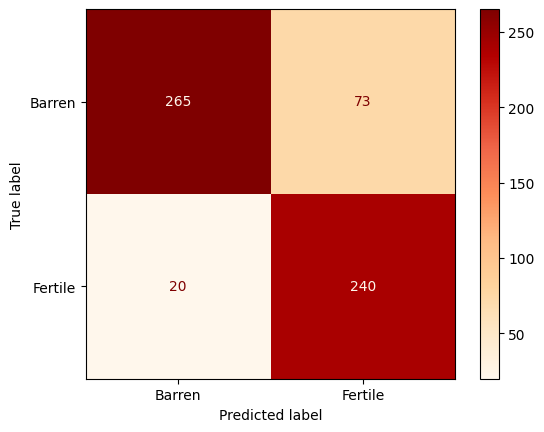

In [151]:
ConfusionMatrixDisplay(cm, display_labels=['Barren', 'Fertile']).plot(cmap='OrRd')

In [152]:
target_names = ['Barren', 'Fertility']

report = classification_report(y_test, y_pred, target_names=target_names, digits=4)
print(report)

              precision    recall  f1-score   support

      Barren     0.9298    0.7840    0.8507       338
   Fertility     0.7668    0.9231    0.8377       260

    accuracy                         0.8445       598
   macro avg     0.8483    0.8536    0.8442       598
weighted avg     0.8589    0.8445    0.8451       598



In [153]:
df_new = replace_outliers(df_new)

In [154]:
df_new.to_csv("../data_outliers_handled_knn_imputed")

age_ma float64


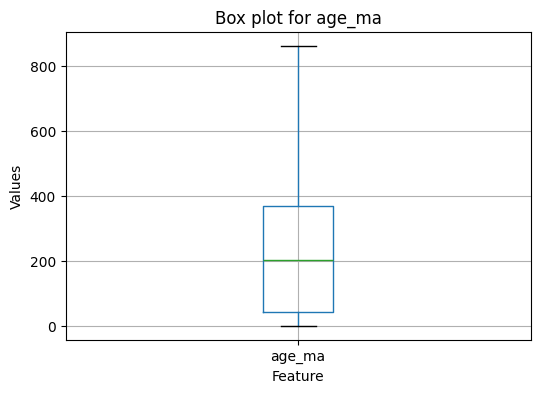

Feature int64


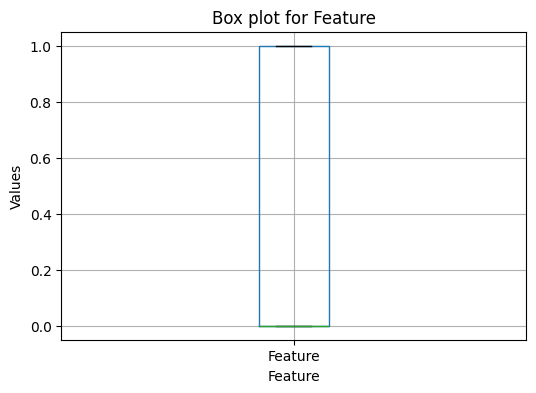

Ti float64


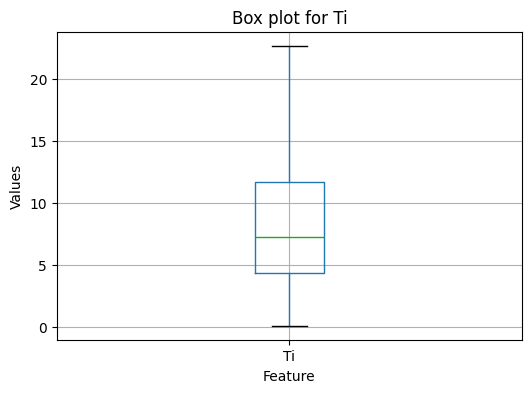

La float64


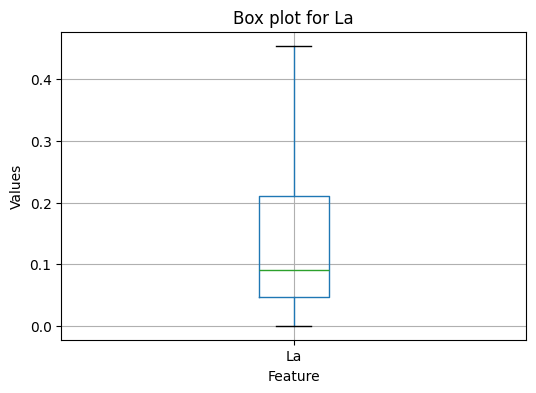

Ce float64


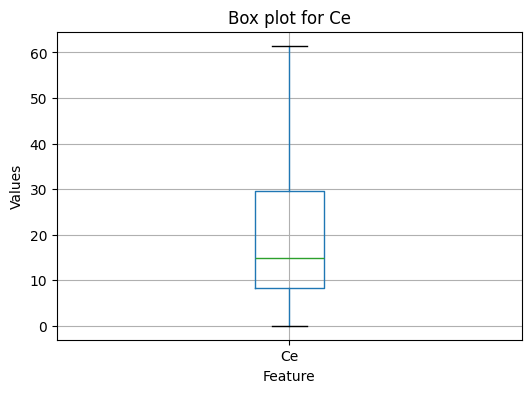

Pr float64


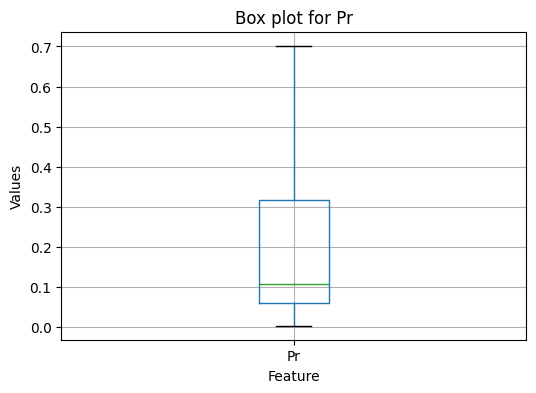

Nd float64


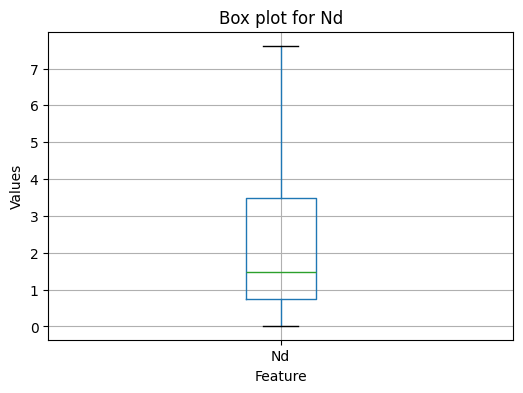

Sm float64


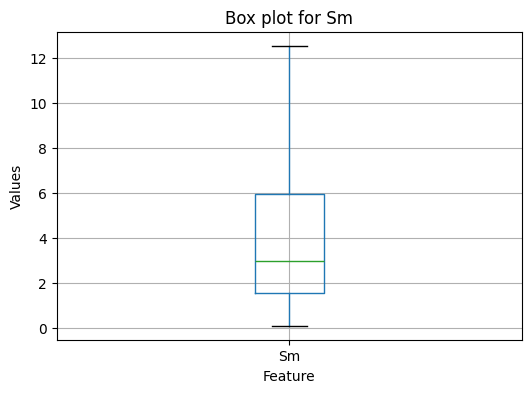

Eu float64


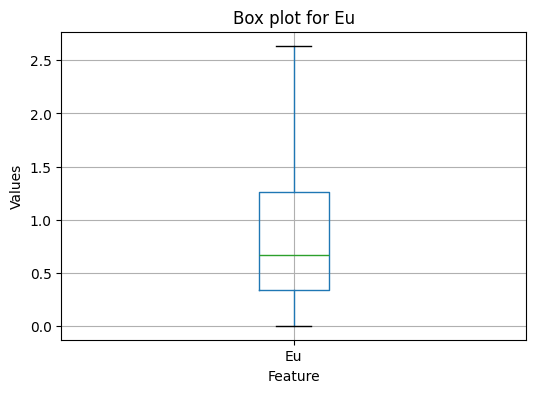

Gd float64


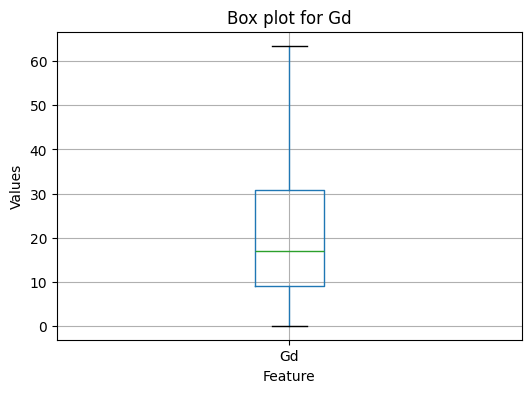

Tb float64


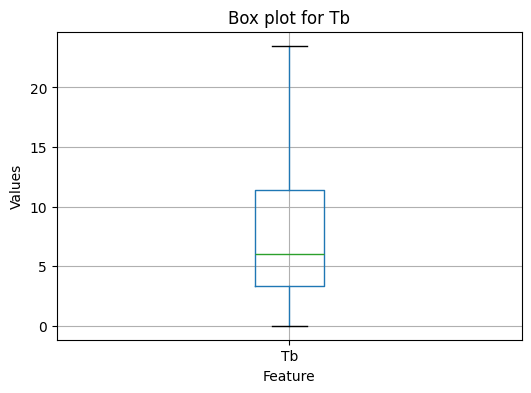

Dy float64


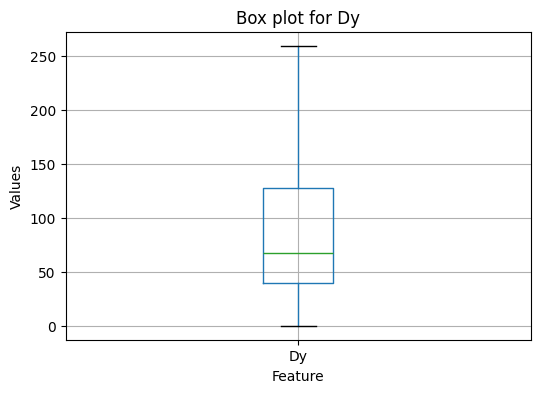

Ho float64


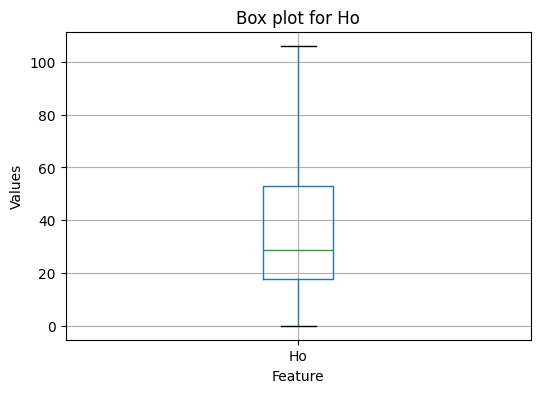

Er float64


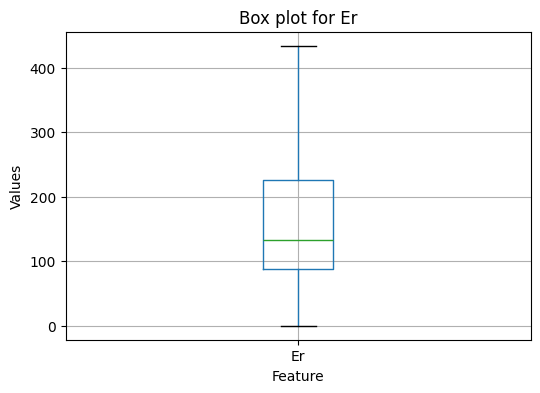

Tm float64


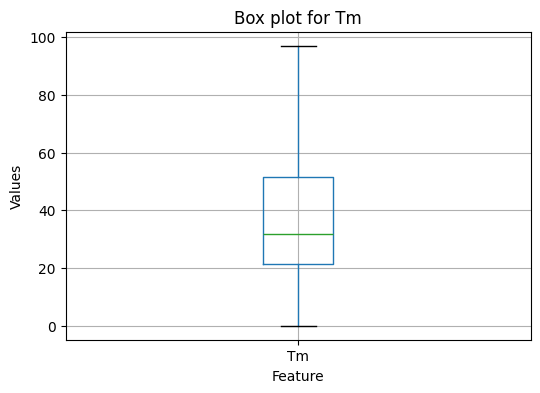

Yb float64


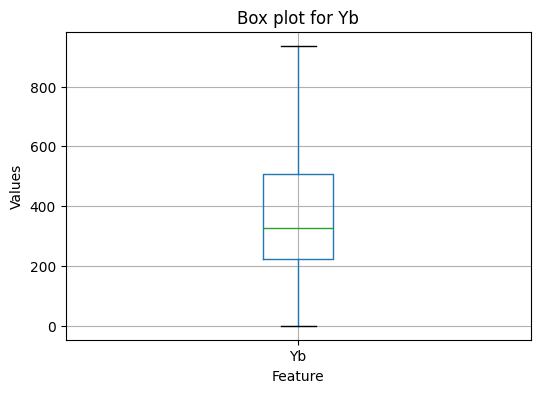

Lu float64


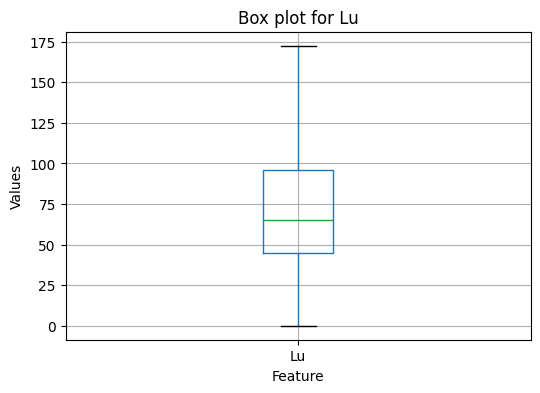

Y float64


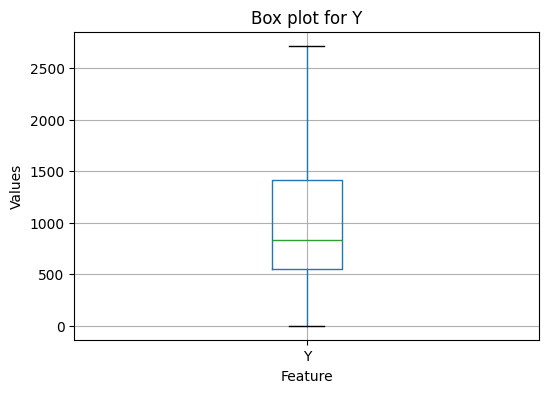

Hf float64


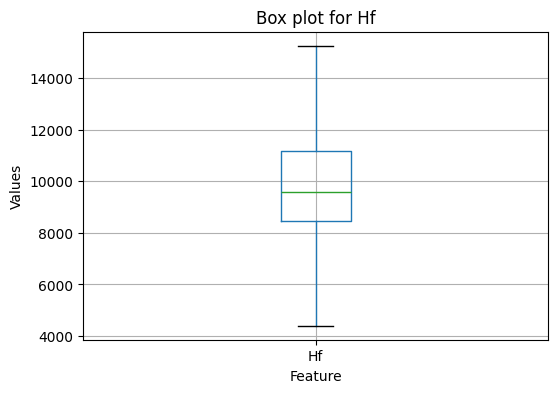

U float64


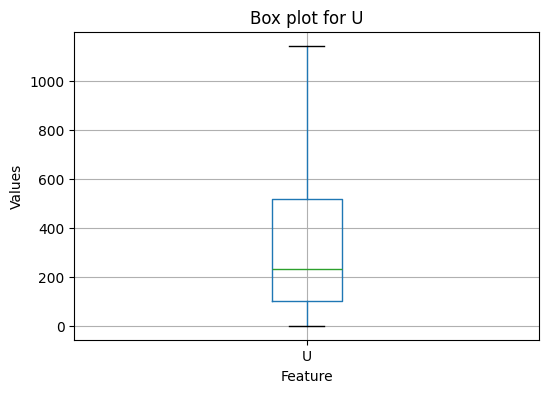

Th float64


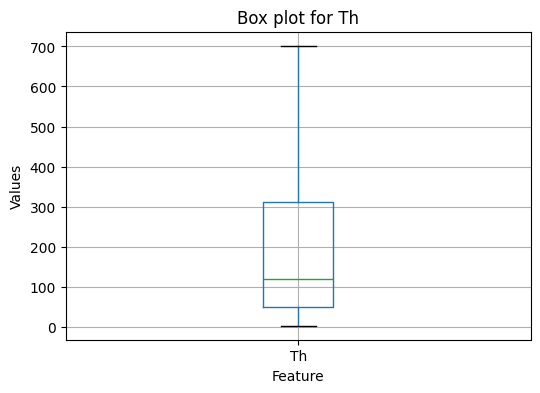

In [155]:
for feature in df_new.columns:
    print(feature, df1_copy[feature].dtype)
    plt.figure(figsize=(6, 4))
    df1_copy[[feature]].boxplot()
    plt.title(f'Box plot for {feature}')
    plt.ylabel('Values')
    plt.xlabel('Feature')
    plt.show()

In [156]:
X = df_new.drop(columns=['Feature'], axis=1)
y = df_new['Feature']

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [158]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [159]:
lr_2 = LogisticRegression()

lr_2.fit(X_train_scaled, y_train)

LogisticRegression()

In [160]:
y_pred = lr_2.predict(X_test_scaled)

In [161]:
y_pred

array([1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1.,
       1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0.,
       1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0.,
       0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0.,
       1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1.,
       0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0.,
       1., 0., 1., 1., 1.

In [162]:
accuracy_score(y_test, y_pred)

0.8678929765886287

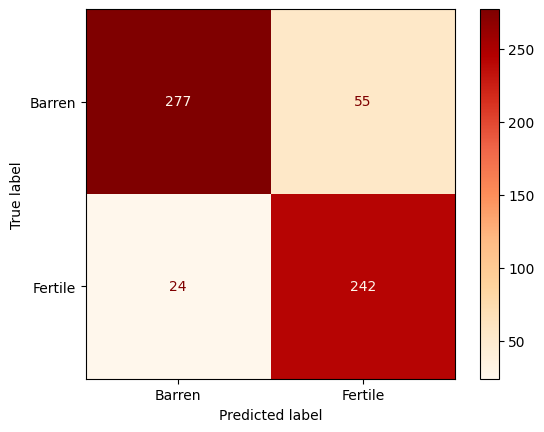

In [163]:
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(cm, display_labels=['Barren', 'Fertile']).plot(cmap='OrRd')

### Hyper-Parameter Tuning: Grid Search CV

In [164]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [165]:
# Hyper-parameters for Logistic Regression

param_grid = {
                'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                'dual': [True, False],
                'C': [0, 0.5, 1],
                'fit_intercept': [True, False],
                'class_weight': ['balanced'],
                'solver': ['liblinear', 'lbfgs', 'newton-cg', 'newton-cholesky'],
                'max_iter': [100, 500, 1000],
                'n_jobs': [-1]
    
             }

In [166]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25, shuffle=True)

In [167]:
import warnings
warnings.filterwarnings('ignore')

In [168]:
clf = GridSearchCV(
                   lr_2, 
                   param_grid=param_grid,
                   scoring = 'precision',
                   cv = 5 ,
                   verbose = 3
                  )

clf.fit(X_train, y_train)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits
[CV 1/5] END C=0, class_weight=balanced, dual=True, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l1, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0, class_weight=balanced, dual=True, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l1, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0, class_weight=balanced, dual=True, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l1, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0, class_weight=balanced, dual=True, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l1, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0, class_weight=balanced, dual=True, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l1, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=0, class_weight=balanced, dual=True, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0

[CV 2/5] END C=0, class_weight=balanced, dual=True, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=l1, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/5] END C=0, class_weight=balanced, dual=True, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=l1, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 4/5] END C=0, class_weight=balanced, dual=True, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=l1, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 5/5] END C=0, class_weight=balanced, dual=True, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=l1, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/5] END C=0, class_weight=balanced, dual=True, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0, class_weight=balanced, dual=True, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0, class_weig

[CV 5/5] END C=0, class_weight=balanced, dual=True, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/5] END C=0, class_weight=balanced, dual=True, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0, class_weight=balanced, dual=True, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0, class_weight=balanced, dual=True, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0, class_weight=balanced, dual=True, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0, class_weight=balanced, dual=True, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 1/

[CV 1/5] END C=0, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=0, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=none, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0, class_weight=balanced, dua

[CV 1/5] END C=0, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=0, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0, 

[CV 1/5] END C=0.5, class_weight=balanced, dual=True, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l1, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.5, class_weight=balanced, dual=True, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l1, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.5, class_weight=balanced, dual=True, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l1, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.5, class_weight=balanced, dual=True, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l1, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.5, class_weight=balanced, dual=True, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l1, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=0.5, class_weight=balanced, dual=True, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.5, class_weight=balanced, dual=Tr

[CV 1/5] END C=0.5, class_weight=balanced, dual=True, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=l2, solver=liblinear;, score=0.824 total time=   0.1s
[CV 2/5] END C=0.5, class_weight=balanced, dual=True, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=l2, solver=liblinear;, score=0.522 total time=   0.1s
[CV 3/5] END C=0.5, class_weight=balanced, dual=True, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=l2, solver=liblinear;, score=0.752 total time=   0.1s
[CV 4/5] END C=0.5, class_weight=balanced, dual=True, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=l2, solver=liblinear;, score=0.565 total time=   0.1s
[CV 5/5] END C=0.5, class_weight=balanced, dual=True, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=l2, solver=liblinear;, score=0.759 total time=   0.1s
[CV 1/5] END C=0.5, class_weight=balanced, dual=True, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=l2, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.5, class_weight=balance

[CV 1/5] END C=0.5, class_weight=balanced, dual=True, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=l2, solver=liblinear;, score=0.552 total time=   0.3s
[CV 2/5] END C=0.5, class_weight=balanced, dual=True, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=l2, solver=liblinear;, score=0.667 total time=   0.2s
[CV 3/5] END C=0.5, class_weight=balanced, dual=True, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=l2, solver=liblinear;, score=0.711 total time=   0.2s
[CV 4/5] END C=0.5, class_weight=balanced, dual=True, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=l2, solver=liblinear;, score=0.508 total time=   0.2s
[CV 5/5] END C=0.5, class_weight=balanced, dual=True, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=l2, solver=liblinear;, score=1.000 total time=   0.2s
[CV 1/5] END C=0.5, class_weight=balanced, dual=True, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=l2, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.5, class_weight=b

[CV 1/5] END C=0.5, class_weight=balanced, dual=True, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=l2, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.5, class_weight=balanced, dual=True, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=l2, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.5, class_weight=balanced, dual=True, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=l2, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.5, class_weight=balanced, dual=True, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=l2, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.5, class_weight=balanced, dual=True, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=l2, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=0.5, class_weight=balanced, dual=True, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=l2, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.5, class_weight=balanced, dual=True, fit_in

[CV 2/5] END C=0.5, class_weight=balanced, dual=True, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=l2, solver=liblinear;, score=0.768 total time=   0.1s
[CV 3/5] END C=0.5, class_weight=balanced, dual=True, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=l2, solver=liblinear;, score=0.727 total time=   0.1s
[CV 4/5] END C=0.5, class_weight=balanced, dual=True, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=l2, solver=liblinear;, score=0.659 total time=   0.1s
[CV 5/5] END C=0.5, class_weight=balanced, dual=True, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=l2, solver=liblinear;, score=0.629 total time=   0.1s
[CV 1/5] END C=0.5, class_weight=balanced, dual=True, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=l2, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.5, class_weight=balanced, dual=True, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=l2, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.5, class_weight=balance

[CV 1/5] END C=0.5, class_weight=balanced, dual=True, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=l2, solver=liblinear;, score=0.524 total time=   0.3s
[CV 2/5] END C=0.5, class_weight=balanced, dual=True, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=l2, solver=liblinear;, score=0.576 total time=   0.3s
[CV 3/5] END C=0.5, class_weight=balanced, dual=True, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=l2, solver=liblinear;, score=0.439 total time=   0.3s
[CV 4/5] END C=0.5, class_weight=balanced, dual=True, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=l2, solver=liblinear;, score=0.469 total time=   0.3s
[CV 5/5] END C=0.5, class_weight=balanced, dual=True, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=l2, solver=liblinear;, score=0.508 total time=   0.3s
[CV 1/5] END C=0.5, class_weight=balanced, dual=True, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=l2, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.5, class_we

[CV 1/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l1, solver=liblinear;, score=0.849 total time=   0.3s
[CV 2/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l1, solver=liblinear;, score=0.802 total time=   0.2s
[CV 3/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l1, solver=liblinear;, score=0.793 total time=   0.2s
[CV 4/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l1, solver=liblinear;, score=0.843 total time=   0.2s
[CV 5/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l1, solver=liblinear;, score=0.796 total time=   0.2s
[CV 1/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.5, class_weight=b

/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l2, solver=lbfgs;, score=0.776 total time=   1.4s


/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l2, solver=lbfgs;, score=0.708 total time=   0.7s


/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l2, solver=lbfgs;, score=0.741 total time=   0.5s


/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV 4/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l2, solver=lbfgs;, score=0.746 total time=   0.7s
[CV 5/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l2, solver=lbfgs;, score=0.757 total time=   0.0s


/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l2, solver=newton-cg;, score=0.855 total time=   0.8s
[CV 2/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l2, solver=newton-cg;, score=0.802 total time=   0.2s


/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l2, solver=newton-cg;, score=0.803 total time=   0.8s
[CV 4/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l2, solver=newton-cg;, score=0.838 total time=   0.2s


/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l2, solver=newton-cg;, score=0.792 total time=   0.2s
[CV 1/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l2, solver=newton-cholesky;, score=0.855 total time=   0.0s
[CV 2/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l2, solver=newton-cholesky;, score=0.802 total time=   0.0s
[CV 3/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l2, solver=newton-cholesky;, score=0.803 total time=   0.0s
[CV 4/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l2, solver=newton-cholesky;, score=0.843 total time=   0.0s
[CV 5/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l2, solver=newton-cholesky;, score=0.797 total time=   0.6

/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV 5/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=none, solver=lbfgs;, score=0.742 total time=   0.0s
[CV 1/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=none, solver=newton-cg;, score=0.849 total time=   0.2s


/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=none, solver=newton-cg;, score=0.802 total time=   0.1s
[CV 3/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=none, solver=newton-cg;, score=0.798 total time=   0.2s


/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=none, solver=newton-cg;, score=0.848 total time=   0.2s
[CV 5/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=none, solver=newton-cg;, score=0.797 total time=   0.2s
[CV 1/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=none, solver=newton-cholesky;, score=0.849 total time=   0.0s


/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=none, solver=newton-cholesky;, score=0.802 total time=   0.6s
[CV 3/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=none, solver=newton-cholesky;, score=0.802 total time=   0.0s
[CV 4/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=none, solver=newton-cholesky;, score=0.848 total time=   0.0s
[CV 5/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=none, solver=newton-cholesky;, score=0.797 total time=   0.0s
[CV 1/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=l1, solver=liblinear;, score=0.849 total time=   0.2s
[CV 2/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=l1, solver=liblinear;, score=0.802 total time=   0

/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV 1/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=l2, solver=lbfgs;, score=0.809 total time=   0.1s
[CV 2/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=l2, solver=lbfgs;, score=0.763 total time=   0.2s


/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV 3/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=l2, solver=lbfgs;, score=0.783 total time=   0.2s
[CV 4/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=l2, solver=lbfgs;, score=0.825 total time=   0.1s


/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=l2, solver=lbfgs;, score=0.793 total time=   0.1s
[CV 1/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=l2, solver=newton-cg;, score=0.855 total time=   0.2s
[CV 2/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=l2, solver=newton-cg;, score=0.802 total time=   0.2s
[CV 3/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=l2, solver=newton-cg;, score=0.803 total time=   0.2s
[CV 4/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=l2, solver=newton-cg;, score=0.843 total time=   0.2s
[CV 5/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=l2, solver=newton-cg;, score=0.797 total time=   0.2s
[CV 1/5] END C=0.5, class_weight

/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV 2/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=none, solver=lbfgs;, score=0.753 total time=   0.1s
[CV 3/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=none, solver=lbfgs;, score=0.787 total time=   0.1s


/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV 4/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=none, solver=lbfgs;, score=0.843 total time=   0.1s
[CV 5/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=none, solver=lbfgs;, score=0.789 total time=   0.1s


/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=none, solver=newton-cg;, score=0.849 total time=   0.2s
[CV 2/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=none, solver=newton-cg;, score=0.802 total time=   0.2s


/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 3/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=none, solver=newton-cg;, score=0.802 total time=   0.2s
[CV 4/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=none, solver=newton-cg;, score=0.848 total time=   0.2s
[CV 5/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=none, solver=newton-cg;, score=0.797 total time=   0.2s
[CV 1/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=none, solver=newton-cholesky;, score=0.849 total time=   0.0s
[CV 2/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=none, solver=newton-cholesky;, score=0.802 total time=   0.0s
[CV 3/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=none, solver=newton-cholesky;, score=0.802 total time=   0.0

/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=l2, solver=lbfgs;, score=0.812 total time=   0.2s


/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=l2, solver=lbfgs;, score=0.805 total time=   0.2s


/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=l2, solver=lbfgs;, score=0.832 total time=   0.2s


/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV 4/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=l2, solver=lbfgs;, score=0.833 total time=   0.2s
[CV 5/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=l2, solver=lbfgs;, score=0.798 total time=   0.2s
[CV 1/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=l2, solver=newton-cg;, score=0.855 total time=   0.2s
[CV 2/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=l2, solver=newton-cg;, score=0.802 total time=   0.2s
[CV 3/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=l2, solver=newton-cg;, score=0.803 total time=   0.2s
[CV 4/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=l2, solver=newton-cg;, score=0.843 total time=   0.2s
[CV 5/5] END C=0.5, class_weig

/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV 1/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=none, solver=lbfgs;, score=0.820 total time=   0.2s
[CV 2/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=none, solver=lbfgs;, score=0.797 total time=   0.1s


/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV 3/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=none, solver=lbfgs;, score=0.825 total time=   0.1s
[CV 4/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=none, solver=lbfgs;, score=0.818 total time=   0.1s


/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=none, solver=lbfgs;, score=0.786 total time=   0.1s
[CV 1/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=none, solver=newton-cg;, score=0.849 total time=   0.2s


/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 2/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=none, solver=newton-cg;, score=0.802 total time=   0.2s
[CV 3/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=none, solver=newton-cg;, score=0.802 total time=   0.2s
[CV 4/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=none, solver=newton-cg;, score=0.848 total time=   0.1s
[CV 5/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=none, solver=newton-cg;, score=0.797 total time=   0.1s
[CV 1/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=none, solver=newton-cholesky;, score=0.849 total time=   0.0s
[CV 2/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=none, solver=newton-cholesky;, score=0.802 total time=   0.0

/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV 3/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=l2, solver=lbfgs;, score=0.743 total time=   0.0s
[CV 4/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=l2, solver=lbfgs;, score=0.751 total time=   0.0s
[CV 5/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=l2, solver=lbfgs;, score=0.767 total time=   0.0s


/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=l2, solver=newton-cg;, score=0.845 total time=   0.2s
[CV 2/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=l2, solver=newton-cg;, score=0.812 total time=   0.1s
[CV 3/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=l2, solver=newton-cg;, score=0.826 total time=   0.1s
[CV 4/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=l2, solver=newton-cg;, score=0.824 total time=   0.1s
[CV 5/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=l2, solver=newton-cg;, score=0.793 total time=   0.1s
[CV 1/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=l2, solver=newton-cholesky;, score=0.845 total time=   0.0s
[CV 2/5] END C=0

/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV 1/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=none, solver=newton-cg;, score=0.825 total time=   0.1s
[CV 2/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=none, solver=newton-cg;, score=0.814 total time=   0.1s


/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=none, solver=newton-cg;, score=0.825 total time=   0.1s
[CV 4/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=none, solver=newton-cg;, score=0.840 total time=   0.1s


/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=none, solver=newton-cg;, score=0.793 total time=   0.1s
[CV 1/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=none, solver=newton-cholesky;, score=0.825 total time=   0.0s
[CV 2/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=none, solver=newton-cholesky;, score=0.814 total time=   0.0s
[CV 3/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=none, solver=newton-cholesky;, score=0.825 total time=   0.0s
[CV 4/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=none, solver=newton-cholesky;, score=0.840 total time=   0.0s
[CV 5/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=none, solver=newton-cholesky;, score=0.793

/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV 1/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=l2, solver=lbfgs;, score=0.811 total time=   0.1s
[CV 2/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=l2, solver=lbfgs;, score=0.769 total time=   0.1s
[CV 3/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=l2, solver=lbfgs;, score=0.799 total time=   0.1s


/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV 4/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=l2, solver=lbfgs;, score=0.769 total time=   0.1s
[CV 5/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=l2, solver=lbfgs;, score=0.783 total time=   0.1s
[CV 1/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=l2, solver=newton-cg;, score=0.845 total time=   0.1s
[CV 2/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=l2, solver=newton-cg;, score=0.812 total time=   0.1s
[CV 3/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=l2, solver=newton-cg;, score=0.826 total time=   0.1s
[CV 4/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=l2, solver=newton-cg;, score=0.824 total time=   0.1s
[CV 5/5] END C=0.5, class_weig

/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV 3/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=none, solver=lbfgs;, score=0.809 total time=   0.1s
[CV 4/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=none, solver=lbfgs;, score=0.792 total time=   0.1s
[CV 5/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=none, solver=lbfgs;, score=0.780 total time=   0.1s


/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV 1/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=none, solver=newton-cg;, score=0.825 total time=   0.1s
[CV 2/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=none, solver=newton-cg;, score=0.814 total time=   0.2s


/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/miniconda3/lib/python3.9/s

[CV 3/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=none, solver=newton-cg;, score=0.825 total time=   0.1s
[CV 4/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=none, solver=newton-cg;, score=0.840 total time=   0.1s
[CV 5/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=none, solver=newton-cg;, score=0.793 total time=   0.1s
[CV 1/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=none, solver=newton-cholesky;, score=0.825 total time=   0.0s
[CV 2/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=none, solver=newton-cholesky;, score=0.814 total time=   0.0s
[CV 3/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=none, solver=newton-cholesky;, score=0.825 total time=

/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV 1/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=l2, solver=lbfgs;, score=0.819 total time=   0.1s
[CV 2/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=l2, solver=lbfgs;, score=0.798 total time=   0.1s


/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV 3/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=l2, solver=lbfgs;, score=0.835 total time=   0.1s
[CV 4/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=l2, solver=lbfgs;, score=0.842 total time=   0.1s


/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=l2, solver=lbfgs;, score=0.785 total time=   0.1s
[CV 1/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=l2, solver=newton-cg;, score=0.845 total time=   0.1s
[CV 2/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=l2, solver=newton-cg;, score=0.812 total time=   0.1s
[CV 3/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=l2, solver=newton-cg;, score=0.826 total time=   0.1s
[CV 4/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=l2, solver=newton-cg;, score=0.824 total time=   0.1s
[CV 5/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=l2, solver=newton-cg;, score=0.793 total time=   0.1s
[CV 1/5] END C=0.5, 

/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV 2/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=none, solver=lbfgs;, score=0.792 total time=   0.1s
[CV 3/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=none, solver=lbfgs;, score=0.834 total time=   0.1s


/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV 4/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=none, solver=lbfgs;, score=0.843 total time=   0.1s
[CV 5/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=none, solver=lbfgs;, score=0.782 total time=   0.1s


/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 1/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=none, solver=newton-cg;, score=0.825 total time=   0.1s
[CV 2/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=none, solver=newton-cg;, score=0.814 total time=   0.2s


/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/miniconda3/lib/python3.9/s

[CV 3/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=none, solver=newton-cg;, score=0.825 total time=   0.1s
[CV 4/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=none, solver=newton-cg;, score=0.840 total time=   0.2s
[CV 5/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=none, solver=newton-cg;, score=0.793 total time=   0.3s
[CV 1/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=none, solver=newton-cholesky;, score=0.825 total time=   0.0s
[CV 2/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=none, solver=newton-cholesky;, score=0.814 total time=   0.0s
[CV 3/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=none, solver=newton-cholesky;, score=0.825 total

[CV 1/5] END C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=l2, solver=liblinear;, score=0.444 total time=   0.1s
[CV 2/5] END C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=l2, solver=liblinear;, score=0.474 total time=   0.1s
[CV 3/5] END C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=l2, solver=liblinear;, score=1.000 total time=   0.1s
[CV 4/5] END C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=l2, solver=liblinear;, score=0.792 total time=   0.1s
[CV 5/5] END C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=l2, solver=liblinear;, score=0.730 total time=   0.1s
[CV 1/5] END C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=l2, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1, class_weight=balanced, dual=True, 

[CV 1/5] END C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=l2, solver=liblinear;, score=0.846 total time=   0.2s
[CV 2/5] END C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=l2, solver=liblinear;, score=0.703 total time=   0.2s
[CV 3/5] END C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=l2, solver=liblinear;, score=0.709 total time=   0.2s
[CV 4/5] END C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=l2, solver=liblinear;, score=0.790 total time=   0.2s
[CV 5/5] END C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=l2, solver=liblinear;, score=0.833 total time=   0.2s
[CV 1/5] END C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=l2, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1, class_weight=balanced, dual=

[CV 5/5] END C=1, class_weight=balanced, dual=True, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=l2, solver=liblinear;, score=0.721 total time=   0.0s
[CV 1/5] END C=1, class_weight=balanced, dual=True, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=l2, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1, class_weight=balanced, dual=True, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=l2, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1, class_weight=balanced, dual=True, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=l2, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=1, class_weight=balanced, dual=True, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=l2, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=1, class_weight=balanced, dual=True, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=l2, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=1, class_weight=balanced, dual=True, fit_intercept=Fals

[CV 2/5] END C=1, class_weight=balanced, dual=True, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=l2, solver=liblinear;, score=0.571 total time=   0.1s
[CV 3/5] END C=1, class_weight=balanced, dual=True, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=l2, solver=liblinear;, score=0.678 total time=   0.1s
[CV 4/5] END C=1, class_weight=balanced, dual=True, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=l2, solver=liblinear;, score=1.000 total time=   0.1s
[CV 5/5] END C=1, class_weight=balanced, dual=True, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=l2, solver=liblinear;, score=0.500 total time=   0.1s
[CV 1/5] END C=1, class_weight=balanced, dual=True, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=l2, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1, class_weight=balanced, dual=True, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=l2, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1, class_weight=balanced, dual=True, 

[CV 1/5] END C=1, class_weight=balanced, dual=True, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=l2, solver=liblinear;, score=0.772 total time=   0.2s
[CV 2/5] END C=1, class_weight=balanced, dual=True, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=l2, solver=liblinear;, score=0.846 total time=   0.2s
[CV 3/5] END C=1, class_weight=balanced, dual=True, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=l2, solver=liblinear;, score=0.466 total time=   0.2s
[CV 4/5] END C=1, class_weight=balanced, dual=True, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=l2, solver=liblinear;, score=0.500 total time=   0.2s
[CV 5/5] END C=1, class_weight=balanced, dual=True, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=l2, solver=liblinear;, score=0.705 total time=   0.2s
[CV 1/5] END C=1, class_weight=balanced, dual=True, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=l2, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1, class_weight=balanced,

[CV 2/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l1, solver=liblinear;, score=0.802 total time=   0.2s
[CV 3/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l1, solver=liblinear;, score=0.802 total time=   0.2s
[CV 4/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l1, solver=liblinear;, score=0.843 total time=   0.2s
[CV 5/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l1, solver=liblinear;, score=0.792 total time=   0.1s
[CV 1/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1, class_weight=balanced, dual=False,

/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV 3/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l2, solver=lbfgs;, score=0.758 total time=   0.0s
[CV 4/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l2, solver=lbfgs;, score=0.749 total time=   0.0s
[CV 5/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l2, solver=lbfgs;, score=0.753 total time=   0.0s
[CV 1/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l2, solver=newton-cg;, score=0.849 total time=   0.1s


/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l2, solver=newton-cg;, score=0.802 total time=   0.1s
[CV 3/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l2, solver=newton-cg;, score=0.807 total time=   0.1s


/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (st

[CV 4/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l2, solver=newton-cg;, score=0.838 total time=   0.1s
[CV 5/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l2, solver=newton-cg;, score=0.792 total time=   0.1s
[CV 1/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l2, solver=newton-cholesky;, score=0.849 total time=   0.0s
[CV 2/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l2, solver=newton-cholesky;, score=0.802 total time=   0.0s
[CV 3/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l2, solver=newton-cholesky;, score=0.808 total time=   0.0s
[CV 4/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l2, solver=newton-cholesky;, score=0.843 total time=   0.0s
[CV 5/5] END C=1

/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV 3/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=none, solver=lbfgs;, score=0.744 total time=   0.0s
[CV 4/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=none, solver=lbfgs;, score=0.757 total time=   0.0s
[CV 5/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=none, solver=lbfgs;, score=0.742 total time=   0.0s
[CV 1/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=none, solver=newton-cg;, score=0.849 total time=   0.1s


/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=none, solver=newton-cg;, score=0.802 total time=   0.1s
[CV 3/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=none, solver=newton-cg;, score=0.798 total time=   0.1s


/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=none, solver=newton-cg;, score=0.848 total time=   0.1s
[CV 5/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=none, solver=newton-cg;, score=0.797 total time=   0.1s
[CV 1/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=none, solver=newton-cholesky;, score=0.849 total time=   0.0s
[CV 2/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=none, solver=newton-cholesky;, score=0.802 total time=   0.0s
[CV 3/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=none, solver=newton-cholesky;, score=0.802 total time=   0.0s
[CV 4/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=none, solver=newton-cholesky;, score=0.848 total time=   0.0s
[CV 

/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV 2/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=l2, solver=lbfgs;, score=0.759 total time=   0.1s
[CV 3/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=l2, solver=lbfgs;, score=0.792 total time=   0.1s
[CV 4/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=l2, solver=lbfgs;, score=0.798 total time=   0.1s


/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV 5/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=l2, solver=lbfgs;, score=0.778 total time=   0.1s
[CV 1/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=l2, solver=newton-cg;, score=0.849 total time=   0.1s
[CV 2/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=l2, solver=newton-cg;, score=0.802 total time=   0.1s
[CV 3/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=l2, solver=newton-cg;, score=0.808 total time=   0.1s
[CV 4/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=l2, solver=newton-cg;, score=0.843 total time=   0.1s
[CV 5/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=l2, solver=newton-cg;, score=0.797 total time=   0.1s
[CV 1/5] END C=1, class_weight=balanced, dua

/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV 1/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=none, solver=lbfgs;, score=0.824 total time=   0.1s
[CV 2/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=none, solver=lbfgs;, score=0.753 total time=   0.1s
[CV 3/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=none, solver=lbfgs;, score=0.787 total time=   0.1s


/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV 4/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=none, solver=lbfgs;, score=0.843 total time=   0.1s
[CV 5/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=none, solver=lbfgs;, score=0.789 total time=   0.1s
[CV 1/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=none, solver=newton-cg;, score=0.849 total time=   0.2s
[CV 2/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=none, solver=newton-cg;, score=0.802 total time=   0.2s


/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 3/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=none, solver=newton-cg;, score=0.802 total time=   0.2s
[CV 4/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=none, solver=newton-cg;, score=0.848 total time=   0.1s
[CV 5/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=none, solver=newton-cg;, score=0.797 total time=   0.1s
[CV 1/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=none, solver=newton-cholesky;, score=0.849 total time=   0.0s
[CV 2/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=none, solver=newton-cholesky;, score=0.802 total time=   0.0s
[CV 3/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=none, solver=newton-cholesky;, score=0.802 total time=   0.0s
[CV 4/5] E

/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV 2/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=l2, solver=lbfgs;, score=0.798 total time=   0.1s
[CV 3/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=l2, solver=lbfgs;, score=0.831 total time=   0.1s


/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV 4/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=l2, solver=lbfgs;, score=0.854 total time=   0.1s
[CV 5/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=l2, solver=lbfgs;, score=0.773 total time=   0.1s


/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=l2, solver=newton-cg;, score=0.849 total time=   0.1s
[CV 2/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=l2, solver=newton-cg;, score=0.802 total time=   0.1s
[CV 3/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=l2, solver=newton-cg;, score=0.808 total time=   0.1s
[CV 4/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=l2, solver=newton-cg;, score=0.843 total time=   0.1s
[CV 5/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=l2, solver=newton-cg;, score=0.797 total time=   0.1s
[CV 1/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=l2, solver=newton-cholesky;, score=0.849 total time=   0.0s
[CV 2/5] END C=1, class_weig

/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV 2/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=none, solver=lbfgs;, score=0.797 total time=   0.1s
[CV 3/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=none, solver=lbfgs;, score=0.825 total time=   0.1s


/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV 4/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=none, solver=lbfgs;, score=0.818 total time=   0.1s
[CV 5/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=none, solver=lbfgs;, score=0.786 total time=   0.1s


/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=none, solver=newton-cg;, score=0.849 total time=   0.2s
[CV 2/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=none, solver=newton-cg;, score=0.802 total time=   0.2s


/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 3/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=none, solver=newton-cg;, score=0.802 total time=   0.2s
[CV 4/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=none, solver=newton-cg;, score=0.848 total time=   0.1s
[CV 5/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=none, solver=newton-cg;, score=0.797 total time=   0.1s
[CV 1/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=none, solver=newton-cholesky;, score=0.849 total time=   0.0s
[CV 2/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=none, solver=newton-cholesky;, score=0.802 total time=   0.0s
[CV 3/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=none, solver=newton-cholesky;, score=0.802 total time=   0.0s
[CV 

/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV 2/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=l2, solver=lbfgs;, score=0.716 total time=   0.0s
[CV 3/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=l2, solver=lbfgs;, score=0.745 total time=   0.0s
[CV 4/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=l2, solver=lbfgs;, score=0.757 total time=   0.0s
[CV 5/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=l2, solver=lbfgs;, score=0.767 total time=   0.0s
[CV 1/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=l2, solver=newton-cg;, score=0.825 total time=   0.1s


/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not c

[CV 2/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=l2, solver=newton-cg;, score=0.812 total time=   0.1s
[CV 3/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=l2, solver=newton-cg;, score=0.825 total time=   0.1s


/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
 

[CV 4/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=l2, solver=newton-cg;, score=0.835 total time=   0.1s
[CV 5/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=l2, solver=newton-cg;, score=0.798 total time=   0.1s
[CV 1/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=l2, solver=newton-cholesky;, score=0.825 total time=   0.0s
[CV 2/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=l2, solver=newton-cholesky;, score=0.812 total time=   0.0s
[CV 3/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=l2, solver=newton-cholesky;, score=0.825 total time=   0.0s
[CV 4/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=l2, solver=newton-cholesky;, score=0.835 total time=   0.0s
[CV 5/5] E

/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV 3/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=none, solver=lbfgs;, score=0.743 total time=   0.0s
[CV 4/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=none, solver=lbfgs;, score=0.756 total time=   0.0s
[CV 5/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=none, solver=lbfgs;, score=0.751 total time=   0.0s
[CV 1/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=none, solver=newton-cg;, score=0.825 total time=   0.1s


/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=none, solver=newton-cg;, score=0.814 total time=   0.1s
[CV 3/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=none, solver=newton-cg;, score=0.825 total time=   0.1s


/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=none, solver=newton-cg;, score=0.840 total time=   0.1s
[CV 5/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=none, solver=newton-cg;, score=0.793 total time=   0.1s
[CV 1/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=none, solver=newton-cholesky;, score=0.825 total time=   0.0s
[CV 2/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=none, solver=newton-cholesky;, score=0.814 total time=   0.0s
[CV 3/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=none, solver=newton-cholesky;, score=0.825 total time=   0.0s
[CV 4/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=none, solver=newton-cholesky;, score=0.840 total time=   0.0

/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV 1/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=l2, solver=lbfgs;, score=0.810 total time=   0.1s
[CV 2/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=l2, solver=lbfgs;, score=0.754 total time=   0.1s
[CV 3/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=l2, solver=lbfgs;, score=0.797 total time=   0.1s


/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV 4/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=l2, solver=lbfgs;, score=0.772 total time=   0.1s
[CV 5/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=l2, solver=lbfgs;, score=0.774 total time=   0.1s
[CV 1/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=l2, solver=newton-cg;, score=0.825 total time=   0.1s
[CV 2/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=l2, solver=newton-cg;, score=0.812 total time=   0.2s


/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 3/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=l2, solver=newton-cg;, score=0.825 total time=   0.3s
[CV 4/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=l2, solver=newton-cg;, score=0.835 total time=   0.2s
[CV 5/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=l2, solver=newton-cg;, score=0.798 total time=   0.2s
[CV 1/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=l2, solver=newton-cholesky;, score=0.825 total time=   0.0s


/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 2/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=l2, solver=newton-cholesky;, score=0.812 total time=   0.0s
[CV 3/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=l2, solver=newton-cholesky;, score=0.825 total time=   0.0s
[CV 4/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=l2, solver=newton-cholesky;, score=0.835 total time=   0.0s
[CV 5/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=l2, solver=newton-cholesky;, score=0.798 total time=   0.0s
[CV 1/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0

/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV 2/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=none, solver=lbfgs;, score=0.760 total time=   0.1s
[CV 3/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=none, solver=lbfgs;, score=0.809 total time=   0.1s


/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV 4/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=none, solver=lbfgs;, score=0.792 total time=   0.1s
[CV 5/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=none, solver=lbfgs;, score=0.780 total time=   0.1s


/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 1/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=none, solver=newton-cg;, score=0.825 total time=   0.2s


/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 2/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=none, solver=newton-cg;, score=0.814 total time=   0.3s


/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 3/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=none, solver=newton-cg;, score=0.825 total time=   0.2s
[CV 4/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=none, solver=newton-cg;, score=0.840 total time=   0.3s
[CV 5/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=none, solver=newton-cg;, score=0.793 total time=   0.2s
[CV 1/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=none, solver=newton-cholesky;, score=0.825 total time=   0.0s
[CV 2/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=none, solver=newton-cholesky;, score=0.814 total time=   0.0s
[CV 3/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=none, solver=newton-cholesky;, score=0.825 total time=   0.0s
[CV 

/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV 1/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=l2, solver=lbfgs;, score=0.814 total time=   0.2s
[CV 2/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=l2, solver=lbfgs;, score=0.798 total time=   0.2s


/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV 3/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=l2, solver=lbfgs;, score=0.827 total time=   0.1s
[CV 4/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=l2, solver=lbfgs;, score=0.850 total time=   0.1s


/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 5/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=l2, solver=lbfgs;, score=0.791 total time=   0.2s
[CV 1/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=l2, solver=newton-cg;, score=0.825 total time=   0.2s


/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 2/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=l2, solver=newton-cg;, score=0.812 total time=   0.2s
[CV 3/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=l2, solver=newton-cg;, score=0.825 total time=   0.1s
[CV 4/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=l2, solver=newton-cg;, score=0.835 total time=   0.1s
[CV 5/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=l2, solver=newton-cg;, score=0.798 total time=   0.1s
[CV 1/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=l2, solver=newton-cholesky;, score=0.825 total time=   0.0s
[CV 2/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=l2, solver=newton-cholesky;, score=0.812 total time=   0.0s
[CV 3/5] END C=1

/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=none, solver=lbfgs;, score=0.821 total time=   0.1s
[CV 2/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=none, solver=lbfgs;, score=0.792 total time=   0.1s


/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV 3/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=none, solver=lbfgs;, score=0.834 total time=   0.1s
[CV 4/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=none, solver=lbfgs;, score=0.843 total time=   0.1s


/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV 5/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=none, solver=lbfgs;, score=0.782 total time=   0.2s
[CV 1/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=none, solver=newton-cg;, score=0.825 total time=   0.2s


/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from conve

[CV 2/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=none, solver=newton-cg;, score=0.814 total time=   0.2s
[CV 3/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=none, solver=newton-cg;, score=0.825 total time=   0.2s
[CV 4/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=none, solver=newton-cg;, score=0.840 total time=   0.2s
[CV 5/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=none, solver=newton-cg;, score=0.793 total time=   0.2s
[CV 1/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=none, solver=newton-cholesky;, score=0.825 total time=   0.0s
[CV 2/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=none, solver=newton-cholesky;, score=0.814 total time=   0.0s
[CV 

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0, 0.5, 1], 'class_weight': ['balanced'],
                         'dual': [True, False], 'fit_intercept': [True, False],
                         'max_iter': [100, 500, 1000], 'n_jobs': [-1],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['liblinear', 'lbfgs', 'newton-cg',
                                    'newton-cholesky']},
             scoring='precision', verbose=3)

In [169]:
clf.best_params_

{'C': 1,
 'class_weight': 'balanced',
 'dual': True,
 'fit_intercept': False,
 'max_iter': 100,
 'n_jobs': -1,
 'penalty': 'l2',
 'solver': 'liblinear'}

In [170]:
clf.best_score_

0.8488767644649997

In [171]:
best_model_lr = LogisticRegression(C= 0.5,
                                 class_weight = 'balanced',
                                 dual= False,
                                 fit_intercept= True,
                                 max_iter= 100,
                                 n_jobs= -1,
                                 penalty= 'l2',
                                 solver= 'liblinear')

In [172]:
best_model_lr.fit(X_train, y_train)

LogisticRegression(C=0.5, class_weight='balanced', n_jobs=-1,
                   solver='liblinear')

In [173]:
y_pred_best = best_model_lr.predict(X_valid)

In [174]:
accuracy_score(y_valid, y_pred_best)

0.8812709030100334

### Random Forest

In [175]:
from sklearn import ensemble

In [176]:
rf = ensemble.RandomForestClassifier()

In [177]:
rf.fit(X_train.values, y_train.values)

RandomForestClassifier()

In [178]:
preds_rf = rf.predict(X_valid)

In [179]:
accuracy_score(y_valid, preds_rf)

0.9498327759197325

### Hyper-Parameter Tuning: Bayesian Optimization

In [180]:
# !pip install scikit-optimize

In [181]:
from functools import partial
from skopt import gp_minimize
from skopt import space
from sklearn import model_selection

In [182]:
def optimize(params, param_names, x, y):
    params = dict(zip(param_names, params))
#     model = LogisticRegression(**params)
    model = ensemble.RandomForestClassifier(**params)
    kfold = model_selection.StratifiedKFold(n_splits=5)
    accuracies = []
    
    for idx in kfold.split(X=x, y=y):
        train_idx, valid_idx = idx[0], idx[1]        
        xtrain = x[train_idx]
        ytrain = y[train_idx]
        
        xvalid = x[valid_idx]
        yvalid = y[valid_idx]
        
        model.fit(xtrain, ytrain)        
        preds = model.predict(xvalid)        
        fold_accuracy = accuracy_score(yvalid, preds)
        
        accuracies.append(fold_accuracy)
        
    return -1.0 * np.mean(accuracies)

In [183]:
# param_grid = {
#                 'penalty': ['l1', 'l2', 'elasticnet', 'none'],
#                 'dual': [True, False],
#                 'C': [0, 0.5, 1],
#                 'fit_intercept': [True, False],
#                 'class_weight': ['balanced'],
#                 'solver': ['liblinear', 'lbfgs', 'newton-cg', 'newton-cholesky'],
#                 'max_iter': [100, 500, 1000],
#                 'n_jobs': [-1]
    
#              }

In [184]:
# param_space = [
    
#     space.Categorical(categories=['l1', 'none'], name='penalty'),
#     space.Categorical(categories=[True, False], name='dual'),
#     space.Real(0, 1, prior='uniform', name='C'),
#     space.Categorical(categories=[True, False], name='fit_intercept'),
# #     space.Categorical(categories=['balanced', 'none'], name='class_weight'),
#     space.Categorical(['liblinear', 'lbfgs', 'newton-cg', 'newton-cholesky'], name='solver'),
#     space.Integer(100, 500, name='max_iter')
    
# ]

In [185]:
# param_names = [
#             'penalty',
#             'dual',
#             'C',
#             'fit_intercept',
# #             'class_weight',
#             'solver',
#             'max_iter'
# ]

In [186]:
param_space = [
    space.Integer(3, 15, name='max_depth'),
    space.Integer(100, 1000, name='n_estimators'),
    space.Categorical(categories=['gini', 'entropy'], name='criterion'),
    space.Categorical(['sqrt', 'log2'], name='max_features')
] 

In [187]:
param_names = [
    'max_depth', 'n_estimators', 'criterion',  'max_features'
]

In [188]:
optimization_function = partial(optimize, param_names = param_names, x = X.values, y = y.values)

In [189]:
type(X.values)

numpy.ndarray

In [190]:
# result = gp_minimize(func=optimization_function,
#                      dimensions = param_space,
#                      n_calls=30,
#                      n_random_starts=30,
#                      verbose=10,
#                      n_jobs=-1)

In [191]:
# print(dict(zip(param_names, result.x)))

In [192]:
# best_model_rf = ensemble.RandomForestClassifier(max_depth= 7, n_estimators= 267, criterion= 'entropy', max_features= 'sqrt')

In [193]:
# best_model_rf.fit(X_train, y_train)

In [194]:
# preds_best_rf = best_model_rf.predict(X_test)

In [195]:
# accuracy_score(y_test, preds_best_rf)